In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.in1d([1, 2, 3], [5, 6, 8, 9, 2, 0, 1])

array([ True,  True, False])

In [3]:
np.in1d([5, 6, 8, 9, 2, 0, 1], [1, 2, 3])

array([False, False, False, False,  True, False,  True])

In [2]:
import struct
N=944 # размер матрицы данных в файле grd
R = np.zeros ((N, N)) # матрица для прочитанных данных

def ReadFile(fname):
    try:
        f=open(fname, "rb")
        C=f.read(4).decode("utf-8")
        N_x=int.from_bytes(f.read(2), "little") # кол-во ячеек по Х
        N_y=int.from_bytes(f.read(2), "little") # кол-во ячеек по Y
        P=struct.unpack('6d', f.read(6*8))
        Matr = np.zeros ((N, N))
        # далее читаем матрицу построчно и записываем в Matr
        for i in range(N):
            for j in range(N):
                temp=struct.unpack('f', f.read(4))
                Matr[i][j]=temp[0]     
           
    except IOError:
        print("An IOError has occurred!")
    finally:
        f.close()
    return Matr

In [69]:
# Поиск соседей
ds['NEIG'] = [[] for i in range(ds['id_road'].values.size)]
for j in ds['id_road'].values:
    k = ds[ds['id_road']==j]['id_road'].index.values[0]
    for i in ds[ds['id_road']!=j]['id_road'].values:
        if(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]).sum() > 0):
            ds[ds['id_road']==j]['NEIG'].values[0].append(i)

In [217]:
ds['I'] = pd.Series([i for i in df[df['id_road']==k]['i']] for k in number_road)
ds['J'] = pd.Series([j for j in df[df['id_road']==k]['j']] for k in number_road)

In [216]:
df = pd.read_csv("Data/координаты_дорог_ВАП.txt", sep="\t", names=['index', 'i', 'j', 'id_road'])
number_road = np.sort(df['id_road'].unique())
# длина дороги
road_len = [df[df['id_road'] == i]['id_road'].count() for i in number_road]
# координаты дороги
i_coordinate_road = pd.Series([i for i in df[df['id_road']==k]['i']] for k in number_road)
j_coordinate_road = pd.Series([j for j in df[df['id_road']==k]['j']] for k in number_road)
d = {'id_road' : number_road, 'i_coordinate' : i_coordinate_road, 'j_coordinate' : j_coordinate_road, 'len_road' : road_len}
ds = pd.DataFrame(d)
ds.head()

,id_road,i_coordinate,j_coordinate,len_road
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33


In [218]:
ds['x'] = [ds[ds['id_road'] == j]['j_coordinate'].values[0][0] for j in ds['id_road'].unique()]
ds['y'] = [ds[ds['id_road'] == j]['i_coordinate'].values[0][0] for j in ds['id_road'].unique()]
ds['x_last'] = [ds[ds['id_road'] == j]['j_coordinate'].values[0][-1] for j in ds['id_road'].unique()]
ds['y_last'] = [ds[ds['id_road'] == j]['i_coordinate'].values[0][-1] for j in ds['id_road'].unique()]
ds['xy_last'] = [(int(ds[ds['id_road'] == j]['x_last']), int(ds[ds['id_road'] == j]['y_last'])) \
    for j in ds['id_road'].unique()]
ds.head()
ds['xy'] = [(int(ds[ds['id_road'] == j]['x']), int(ds[ds['id_road'] == j]['y'])) \
    for j in ds['id_road'].unique()]
# координаты дороги
# coordinate_road = pd.Series([(i, j) for i, j in zip(df[df['id_road']==k]['i'], df[df['id_road']==k]['j'])] \
#     for k in number_road)
# ds['coordinate'] = coordinate_road
coordinate_road = pd.Series([(i, j) for i, j in zip(ds[ds['id_road']==k]['i_coordinate'].values[0], ds[ds['id_road']==k]['j_coordinate'].values[0])] \
    for k in number_road)
ds['coordinate'] = coordinate_road

In [7]:
# Поиск соседей
ds['neighbours'] = [[] for i in range(ds['id_road'].values.size)]
for j in ds['id_road'].values:
    k = ds[ds['id_road']==j]['id_road'].index.values[0]
    for i in ds[ds['id_road']!=j]['id_road'].values:
        if(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]).sum() > 0):
            ds[ds['id_road']==j]['neighbours'].values[0].append(i)

In [8]:
def new_coord(i, coordi, coordj, flag):
    ki = ds[ds['id_road']==i][coordi].values[0][flag]
    kj = ds[ds['id_road']==i][coordj].values[0][flag]
    if flag == 0:
        ds[ds['id_road']==i][coordi].values[0].reverse()
        ds[ds['id_road']==i][coordj].values[0].reverse()
    for j in range(5):
        ds[ds['id_road']==i][coordi].values[0].append(ki + j)
        ds[ds['id_road']==i][coordj].values[0].append(kj + j)
    for j in range(5):
        ds[ds['id_road']==i][coordi].values[0].append(ki - j)
        ds[ds['id_road']==i][coordj].values[0].append(kj - j)
    for j in range(5):
        ds[ds['id_road']==i][coordi].values[0].append(ki - j)
        ds[ds['id_road']==i][coordj].values[0].append(kj + j)
    for j in range(5):
        ds[ds['id_road']==i][coordi].values[0].append(ki + j)
        ds[ds['id_road']==i][coordj].values[0].append(kj - j)

In [219]:
def new_coord(i, coordi, coordj, flag):
    ki = ds[ds['id_road']==i][coordi].values[0][flag]
    kj = ds[ds['id_road']==i][coordj].values[0][flag]
    e = 6
    if flag == 0:
        for j in range(e):
            ds[ds['id_road']==i][coordi].values[0].insert(0, ki + j)
            ds[ds['id_road']==i][coordj].values[0].insert(0, kj + j)
        for j in range(e):
            ds[ds['id_road']==i][coordi].values[0].insert(0, ki - j)
            ds[ds['id_road']==i][coordj].values[0].insert(0, kj - j)
        for j in range(e):
            ds[ds['id_road']==i][coordi].values[0].insert(0, ki - j)
            ds[ds['id_road']==i][coordj].values[0].insert(0, kj + j)
        for j in range(e):
            ds[ds['id_road']==i][coordi].values[0].insert(0, ki + j)
            ds[ds['id_road']==i][coordj].values[0].insert(0, kj - j)
        for j in range(3):
            ds[ds['id_road']==i][coordi].values[0].insert(0, ki + j)
            ds[ds['id_road']==i][coordj].values[0].insert(0, kj)
        for j in range(3):
            ds[ds['id_road']==i][coordi].values[0].insert(0, ki)
            ds[ds['id_road']==i][coordj].values[0].insert(0, kj+j)
        for j in range(3):
            ds[ds['id_road']==i][coordi].values[0].insert(0, ki - j)
            ds[ds['id_road']==i][coordj].values[0].insert(0, kj)
        for j in range(3):
            ds[ds['id_road']==i][coordi].values[0].insert(0, ki)
            ds[ds['id_road']==i][coordj].values[0].insert(0, kj-j)
    else:
        for j in range(e):
            ds[ds['id_road']==i][coordi].values[0].append(ki + j)
            ds[ds['id_road']==i][coordj].values[0].append(kj + j)
        for j in range(e):
            ds[ds['id_road']==i][coordi].values[0].append(ki - j)
            ds[ds['id_road']==i][coordj].values[0].append(kj - j)
        for j in range(e):
            ds[ds['id_road']==i][coordi].values[0].append(ki - j)
            ds[ds['id_road']==i][coordj].values[0].append(kj + j)
        for j in range(e):
            ds[ds['id_road']==i][coordi].values[0].append(ki + j)
            ds[ds['id_road']==i][coordj].values[0].append(kj - j)
        for j in range(3):
            ds[ds['id_road']==i][coordi].values[0].append(ki + j)
            ds[ds['id_road']==i][coordj].values[0].append(kj)
        for j in range(3):
            ds[ds['id_road']==i][coordi].values[0].append(ki)
            ds[ds['id_road']==i][coordj].values[0].append(kj+j)
        for j in range(3):
            ds[ds['id_road']==i][coordi].values[0].append(ki - j)
            ds[ds['id_road']==i][coordj].values[0].append(kj)
        for j in range(3):
            ds[ds['id_road']==i][coordi].values[0].append(ki)
            ds[ds['id_road']==i][coordj].values[0].append(kj-j)

In [220]:
for i in number_road:
    new_coord(i, 'i_coordinate', 'j_coordinate', -1)
    new_coord(i, 'i_coordinate', 'j_coordinate', 0)

In [221]:
ds['x'] = [ds[ds['id_road'] == j]['j_coordinate'].values[0][0] for j in ds['id_road'].unique()]
ds['y'] = [ds[ds['id_road'] == j]['i_coordinate'].values[0][0] for j in ds['id_road'].unique()]
ds['x_last'] = [ds[ds['id_road'] == j]['j_coordinate'].values[0][-1] for j in ds['id_road'].unique()]
ds['y_last'] = [ds[ds['id_road'] == j]['i_coordinate'].values[0][-1] for j in ds['id_road'].unique()]
ds['xy_last'] = [(int(ds[ds['id_road'] == j]['x_last']), int(ds[ds['id_road'] == j]['y_last'])) \
    for j in ds['id_road'].unique()]
ds.head()
ds['xy'] = [(int(ds[ds['id_road'] == j]['x']), int(ds[ds['id_road'] == j]['y'])) \
    for j in ds['id_road'].unique()]
# координаты дороги
# coordinate_road = pd.Series([(i, j) for i, j in zip(df[df['id_road']==k]['i'], df[df['id_road']==k]['j'])] \
#     for k in number_road)
# ds['coordinate'] = coordinate_road
coordinate_road = pd.Series([(i, j) for i, j in zip(ds[ds['id_road']==k]['i_coordinate'].values[0], ds[ds['id_road']==k]['j_coordinate'].values[0])] \
    for k in number_road)
ds['coordinate'] = coordinate_road

In [222]:
# Поиск соседей
ds['neighbours'] = [[] for i in range(ds['id_road'].values.size)]
for j in ds['id_road'].values:
    k = ds[ds['id_road']==j]['id_road'].index.values[0]
    for i in ds[ds['id_road']!=j]['id_road'].values:
        if(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]).sum() > 0):
            ds[ds['id_road']==j]['neighbours'].values[0].append(i)

In [223]:
[i for i in ds['id_road'].values if len(ds[ds['id_road']==i]['neighbours'].values[0]) == 0]

[]

In [14]:
# Расстояния между соседями
ds['len_neighbours'] = [[] for i in range(ds['id_road'].values.size)]
for j in ds['id_road'].values:
    for i in ds[ds['id_road']==j]['neighbours'].values[0]:
        # Расстояние между узлами дорог
        dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]))[0][0]
        j_ = ds[ds['id_road']==j]['j_coordinate'].values[0][dist1]
        i_ = ds[ds['id_road']==j]['i_coordinate'].values[0][dist1]
        dist2 = np.intersect1d(np.argwhere(np.array(ds[ds['id_road']==i]['i_coordinate'].values[0]) == i_).ravel(), \
            np.argwhere(np.array(ds[ds['id_road']==i]['j_coordinate'].values[0]) == j_).ravel())[0]
        ds[ds['id_road']==j]['len_neighbours'].values[0].append(dist1 + dist2)
        
        

In [42]:
ds[ds['id_road']==1]['I'].values[0][:dist1] + ds[ds['id_road']==2]['I'].values[0][:dist2]

[657,
 656,
 656,
 655,
 655,
 654,
 653,
 653,
 652,
 652,
 651,
 651,
 650,
 649,
 649,
 648,
 648,
 647,
 647,
 646,
 645,
 644,
 644,
 643,
 643,
 642,
 642,
 642,
 642,
 643,
 643,
 643,
 643,
 643,
 643,
 643,
 643,
 643,
 643,
 643,
 643,
 643,
 644,
 644]

In [44]:
# Расстояния между соседями
ds['len_neighbours'] = [[] for i in range(ds['id_road'].values.size)]
ds['rasstoyania_i'] = [[] for i in range(ds['id_road'].values.size)]
ds['rasstoyania_j'] = [[] for i in range(ds['id_road'].values.size)]
for j in ds['id_road'].values:
    for i in ds[ds['id_road']==j]['neighbours'].values[0]:
        # Расстояние между узлами дорог
        dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]))[0][0]
        j_ = ds[ds['id_road']==j]['j_coordinate'].values[0][dist1]
        i_ = ds[ds['id_road']==j]['i_coordinate'].values[0][dist1]
        dist2 = np.intersect1d(np.argwhere(np.array(ds[ds['id_road']==i]['i_coordinate'].values[0]) == i_).ravel(), \
            np.argwhere(np.array(ds[ds['id_road']==i]['j_coordinate'].values[0]) == j_).ravel())[0]
        ds[ds['id_road']==j]['len_neighbours'].values[0].append(dist1 + dist2)
  
        ds[ds['id_road']==j]['rasstoyania_i'].values[0].append(np.array(ds[ds['id_road']==j]['I'].values[0][:dist1] + ds[ds['id_road']==i]['I'].values[0][:dist2][::-1]))
        ds[ds['id_road']==j]['rasstoyania_j'].values[0].append(np.array(ds[ds['id_road']==j]['J'].values[0][:dist1] + ds[ds['id_road']==i]['J'].values[0][:dist2][::-1]))

In [60]:
# Расстояния между соседями
ds['len_neighbours'] = [[] for i in range(ds['id_road'].values.size)]
ds['rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]
for j in ds['id_road'].values:
    for i in ds[ds['id_road']==j]['neighbours'].values[0]:
        # Расстояние между узлами дорог
        dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]))[0][0]
        j_ = ds[ds['id_road']==j]['j_coordinate'].values[0][dist1]
        i_ = ds[ds['id_road']==j]['i_coordinate'].values[0][dist1]
        dist2 = np.intersect1d(np.argwhere(np.array(ds[ds['id_road']==i]['i_coordinate'].values[0]) == i_).ravel(), \
            np.argwhere(np.array(ds[ds['id_road']==i]['j_coordinate'].values[0]) == j_).ravel())[0]
        ds[ds['id_road']==j]['len_neighbours'].values[0].append(dist1 + dist2)
  
        ds[ds['id_road']==j]['rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['I'].values[0][:dist1] + ds[ds['id_road']==i]['I'].values[0][:dist2]))
        ds[ds['id_road']==j]['rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['J'].values[0][:dist1] + ds[ds['id_road']==i]['J'].values[0][:dist2]))

In [195]:
# Расстояния между соседями
ds['len_neighbours'] = [[] for i in range(ds['id_road'].values.size)]
ds['rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]
for j in ds['id_road'].values:
    for i in ds[ds['id_road']==j]['neighbours'].values[0]:
        # Расстояние между узлами дорог
        dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]))[0][0]
        j_ = ds[ds['id_road']==j]['j_coordinate'].values[0][dist1]
        i_ = ds[ds['id_road']==j]['i_coordinate'].values[0][dist1]
        
        dist2 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]]))[0][0]
        j_1 = ds[ds['id_road']==i]['j_coordinate'].values[0][dist2]
        i_1 = ds[ds['id_road']==i]['i_coordinate'].values[0][dist2]
        
        ds[ds['id_road']==j]['len_neighbours'].values[0].append(dist1 + dist2)
  
        ds[ds['id_road']==j]['rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['I'].values[0][:dist1+1] + ds[ds['id_road']==i]['I'].values[0][::-1][:dist2+1]))
        ds[ds['id_road']==j]['rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['J'].values[0][:dist1+1] + ds[ds['id_road']==i]['J'].values[0][::-1][:dist2+1]))

In [239]:
# Расстояния между соседями
ds['len_neighbours'] = [[] for i in range(ds['id_road'].values.size)]
ds['rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]
for j in ds['id_road'].values:
    for i in ds[ds['id_road']==j]['neighbours'].values[0]:
        # Расстояние между узлами дорог
        dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]))[0][0]
        j_ = ds[ds['id_road']==j]['j_coordinate'].values[0][dist1]
        i_ = ds[ds['id_road']==j]['i_coordinate'].values[0][dist1]
        
        dist2 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]]))[0][0]
        j_1 = ds[ds['id_road']==i]['j_coordinate'].values[0][dist2]
        i_1 = ds[ds['id_road']==i]['i_coordinate'].values[0][dist2]
        
        ds[ds['id_road']==j]['len_neighbours'].values[0].append(dist1 + dist2)
  
        ds[ds['id_road']==j]['rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['I'].values[0][:dist1+1-20] + ds[ds['id_road']==i]['I'].values[0][:dist2+1-20]))
        ds[ds['id_road']==j]['rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['J'].values[0][:dist1+1-20] + ds[ds['id_road']==i]['J'].values[0][:dist2+1-20]))

In [243]:
# Расстояния между соседями
ds['len_neighbours'] = [[] for i in range(ds['id_road'].values.size)]
ds['rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]
for j in ds['id_road'].values:
    for i in ds[ds['id_road']==j]['neighbours'].values[0]:
        # Расстояние между узлами дорог
        dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]))[0][0]
        j_ = ds[ds['id_road']==j]['j_coordinate'].values[0][dist1]
        i_ = ds[ds['id_road']==j]['i_coordinate'].values[0][dist1]
        
        dist2 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]]))[0][0]
        j_1 = ds[ds['id_road']==i]['j_coordinate'].values[0][dist2]
        i_1 = ds[ds['id_road']==i]['i_coordinate'].values[0][dist2]
        
        ds[ds['id_road']==j]['len_neighbours'].values[0].append(len(ds[ds['id_road']==j]['I'].values[0][:dist1+1-20]) + len(ds[ds['id_road']==i]['I'].values[0][:dist2+1-20]))
  
        ds[ds['id_road']==j]['rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['I'].values[0][:dist1+1-20] + ds[ds['id_road']==i]['I'].values[0][:dist2+1-20]))
        ds[ds['id_road']==j]['rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['J'].values[0][:dist1+1-20] + ds[ds['id_road']==i]['J'].values[0][:dist2+1-20]))

In [263]:
# Расстояния между соседями
ds['len_neighbours'] = [[] for i in range(ds['id_road'].values.size)]
ds['rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]

ds['time_rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['time_rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]

for j in ds['id_road'].values:
    for i in ds[ds['id_road']==j]['neighbours'].values[0]:
        # Расстояние между узлами дорог
        dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]))[0][0]
        j_ = ds[ds['id_road']==j]['j_coordinate'].values[0][dist1]
        i_ = ds[ds['id_road']==j]['i_coordinate'].values[0][dist1]
        
        dist2 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]]))[0][0]
        j_1 = ds[ds['id_road']==i]['j_coordinate'].values[0][dist2]
        i_1 = ds[ds['id_road']==i]['i_coordinate'].values[0][dist2]
        
        n1 = dist1+1-20
        n2 = dist2+1-20
        if n1 < 0:
            n1 = 0
        if n2 < 0:
            n2 = 0
        ds[ds['id_road']==j]['len_neighbours'].values[0].append(len(ds[ds['id_road']==j]['I'].values[0][:n1]) + len(ds[ds['id_road']==i]['I'].values[0][:n2]))


        ds[ds['id_road']==j]['time_rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['I'].values[0][:n1]))
        ds[ds['id_road']==j]['time_rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['J'].values[0][:n1]))
  
        ds[ds['id_road']==j]['rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['I'].values[0][:n1] + ds[ds['id_road']==i]['I'].values[0][:n2]))
        ds[ds['id_road']==j]['rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['J'].values[0][:n1] + ds[ds['id_road']==i]['J'].values[0][:n2]))

In [276]:
# Расстояния между соседями
ds['len_neighbours'] = [[] for i in range(ds['id_road'].values.size)]
ds['rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]

ds['time_rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['time_rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]

ds['times_rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['times_rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]

for j in ds['id_road'].values:
    for i in ds[ds['id_road']==j]['neighbours'].values[0]:
        # Расстояние между узлами дорог
        dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]))[0][0]
        j_ = ds[ds['id_road']==j]['j_coordinate'].values[0][dist1]
        i_ = ds[ds['id_road']==j]['i_coordinate'].values[0][dist1]
        
        dist2 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]]))[0][0]
        j_1 = ds[ds['id_road']==i]['j_coordinate'].values[0][dist2]
        i_1 = ds[ds['id_road']==i]['i_coordinate'].values[0][dist2]
        
        n1 = dist1+1-20
        n2 = dist2+1-20
        if n1 < 0:
            n1 = 0
        if n2 < 0:
            n2 = 0
        ds[ds['id_road']==j]['len_neighbours'].values[0].append(len(ds[ds['id_road']==j]['I'].values[0][:n1]) + len(ds[ds['id_road']==i]['I'].values[0][:n2]))


        ds[ds['id_road']==j]['time_rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['I'].values[0][:n1]))
        ds[ds['id_road']==j]['time_rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['J'].values[0][:n1]))

        ds[ds['id_road']==j]['times_rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['I'].values[0][n1:]))
        ds[ds['id_road']==j]['times_rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['J'].values[0][n1:]))
    
        ds[ds['id_road']==j]['rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['I'].values[0][:n1] + ds[ds['id_road']==i]['I'].values[0][:n2]))
        ds[ds['id_road']==j]['rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['J'].values[0][:n1] + ds[ds['id_road']==i]['J'].values[0][:n2]))

In [11]:
# Расстояния между соседями
ds['len_neighbours'] = [[] for i in range(ds['id_road'].values.size)]
ds['rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]

ds['time_rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['time_rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]

ds['times_rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['times_rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]

for j in ds['id_road'].values:
    for i in ds[ds['id_road']==j]['neighbours'].values[0]:
        # Расстояние между узлами дорог
        dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]))[0][0]
        j_ = ds[ds['id_road']==j]['j_coordinate'].values[0][dist1]
        i_ = ds[ds['id_road']==j]['i_coordinate'].values[0][dist1]
        
        dist2 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]]))[0][0]
        j_1 = ds[ds['id_road']==i]['j_coordinate'].values[0][dist2]
        i_1 = ds[ds['id_road']==i]['i_coordinate'].values[0][dist2]
        
        n1 = dist1+1-20
        n2 = dist2+1-20
        if n1 < 0:
            n1 = 0
        if n2 < 0:
            n2 = 0
        ds[ds['id_road']==j]['len_neighbours'].values[0].append(len(ds[ds['id_road']==j]['I'].values[0][:n1]) + len(ds[ds['id_road']==i]['I'].values[0][:n2]))


        ds[ds['id_road']==j]['time_rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['I'].values[0][:n1]))
        ds[ds['id_road']==j]['time_rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['J'].values[0][:n1]))

        ds[ds['id_road']==j]['times_rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==i]['I'].values[0][n2:]))
        ds[ds['id_road']==j]['times_rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==i]['J'].values[0][n2:]))
    
        ds[ds['id_road']==j]['rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['I'].values[0][:n1] + ds[ds['id_road']==i]['I'].values[0][:n2]))
        ds[ds['id_road']==j]['rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['J'].values[0][:n1] + ds[ds['id_road']==i]['J'].values[0][:n2]))

In [74]:
# Расстояния между соседями
ds['len_neighbours'] = [[] for i in range(ds['id_road'].values.size)]
ds['rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]

ds['time_rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['time_rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]

ds['times_rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['times_rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]

ds['dist'] = [{} for i in range(ds['id_road'].values.size)]


for j in ds['id_road'].values:
    for i in ds[ds['id_road']==j]['neighbours'].values[0]:
        # Расстояние между узлами дорог
        dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]))[0][0]
        j_ = ds[ds['id_road']==j]['j_coordinate'].values[0][dist1]
        i_ = ds[ds['id_road']==j]['i_coordinate'].values[0][dist1]
        
        dist2 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]]))[0][0]
        j_1 = ds[ds['id_road']==i]['j_coordinate'].values[0][dist2]
        i_1 = ds[ds['id_road']==i]['i_coordinate'].values[0][dist2]
        
        n1 = dist1+1-20
        n2 = dist2+1-20
        if n1 < 0:
            n1 = 0
        if n2 < 0:
            n2 = 0
        ds[ds['id_road']==j]['len_neighbours'].values[0].append(len(ds[ds['id_road']==j]['I'].values[0][:n1]) + len(ds[ds['id_road']==i]['I'].values[0][:n2]))

        ds[ds['id_road']==j]['dist'].values[0][str(i)]=n1

        ds[ds['id_road']==j]['time_rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['I'].values[0][:n1]))
        ds[ds['id_road']==j]['time_rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['J'].values[0][:n1]))

        ds[ds['id_road']==j]['times_rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==i]['I'].values[0][n2:]))
        ds[ds['id_road']==j]['times_rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==i]['J'].values[0][n2:]))
    
        ds[ds['id_road']==j]['rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['I'].values[0][:n1] + ds[ds['id_road']==i]['I'].values[0][:n2]))
        ds[ds['id_road']==j]['rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['J'].values[0][:n1] + ds[ds['id_road']==i]['J'].values[0][:n2]))

In [224]:
# Расстояния между соседями
ds['len_neighbours'] = [[] for i in range(ds['id_road'].values.size)]
ds['rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]

ds['time_rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['time_rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]

ds['times_rasstoyania_i'] = [{} for i in range(ds['id_road'].values.size)]
ds['times_rasstoyania_j'] = [{} for i in range(ds['id_road'].values.size)]

ds['dist'] = [{} for i in range(ds['id_road'].values.size)]


for j in ds['id_road'].values:
    for i in ds[ds['id_road']==j]['neighbours'].values[0]:
        # Расстояние между узлами дорог
        dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]))[0][0]
        j_ = ds[ds['id_road']==j]['j_coordinate'].values[0][dist1]
        i_ = ds[ds['id_road']==j]['i_coordinate'].values[0][dist1]
        
        dist2 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]]))[0][0]
        j_1 = ds[ds['id_road']==i]['j_coordinate'].values[0][dist2]
        i_1 = ds[ds['id_road']==i]['i_coordinate'].values[0][dist2]
        
        n1 = dist1+1-24
        n2 = dist2+1-24
        if n1 < 0:
            n1 = 0
        if n2 < 0:
            n2 = 0
        ds[ds['id_road']==j]['len_neighbours'].values[0].append(len(ds[ds['id_road']==j]['I'].values[0][:n1]) + len(ds[ds['id_road']==i]['I'].values[0][:n2]))

        #ds[ds['id_road']==j]['len_neighbours'].values[0].append(min(n1, n2))
        ds[ds['id_road']==j]['dist'].values[0][str(i)]=n1

        ds[ds['id_road']==j]['time_rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['I'].values[0][:n1]))
        ds[ds['id_road']==j]['time_rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['J'].values[0][:n1]))

        ds[ds['id_road']==j]['times_rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==i]['I'].values[0][n2:]))
        ds[ds['id_road']==j]['times_rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==i]['J'].values[0][n2:]))
    
        ds[ds['id_road']==j]['rasstoyania_i'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['I'].values[0][:n1] + ds[ds['id_road']==i]['I'].values[0][:n2]))
        ds[ds['id_road']==j]['rasstoyania_j'].values[0][str(i)]=(np.array(ds[ds['id_road']==j]['J'].values[0][:n1] + ds[ds['id_road']==i]['J'].values[0][:n2]))

In [172]:
dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==2]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==73]['coordinate'].values[0]]))[0][0]    
dist2 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==73]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==2]['coordinate'].values[0]]))[0][0]
n1, n2 = dist1+1-28, dist2+1-28
print(min(n1, n2))
print(max(n1, n2))
if n1 < 0:
    n1 = 0
if n2 < 0:
    n2 = 0
len(ds[ds['id_road']==2]['I'].values[0][:n1]) + len(ds[ds['id_road']==73]['I'].values[0][:n2])

-12
51


44

In [175]:
dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==16]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==73]['coordinate'].values[0]]))[0][0]    
dist2 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==73]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==16]['coordinate'].values[0]]))[0][0]
n1, n2 = dist1+1-28, dist2+1-28
print(min(n1, n2))
print(max(n1, n2))
if n1 < 0:
    n1 = 0
if n2 < 0:
    n2 = 0
len(ds[ds['id_road']==2]['I'].values[0][:n1]) + len(ds[ds['id_road']==73]['I'].values[0][:n2])

-27
-20


0

In [165]:
n1

59

In [154]:
ds[ds['id_road']==2]['I'].values[0][:0]

[]

In [156]:
len(ds[ds['id_road']==73]['I'].values[0][:0])

0

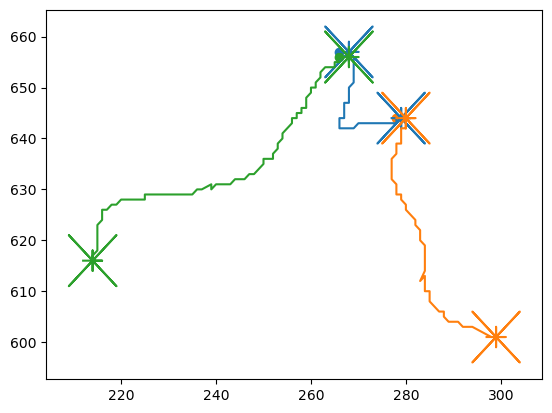

In [225]:
plt.plot(ds[ds['id_road']==2]['j_coordinate'].values[0], ds[ds['id_road']==2]['i_coordinate'].values[0])
plt.plot(ds[ds['id_road']==73]['j_coordinate'].values[0], ds[ds['id_road']==73]['i_coordinate'].values[0])
plt.plot(ds[ds['id_road']==16]['j_coordinate'].values[0], ds[ds['id_road']==16]['i_coordinate'].values[0])
plt.scatter(ds[ds['id_road']==2]['j_coordinate'].values[0][0], ds[ds['id_road']==2]['i_coordinate'].values[0][0])
plt.scatter(ds[ds['id_road']==73]['j_coordinate'].values[0][0], ds[ds['id_road']==73]['i_coordinate'].values[0][0])
plt.scatter(ds[ds['id_road']==16]['j_coordinate'].values[0][0], ds[ds['id_road']==16]['i_coordinate'].values[0][0])

In [226]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,I,J,x,y,x_last,y_last,...,coordinate,neighbours,len_neighbours,rasstoyania_i,rasstoyania_j,time_rasstoyania_i,time_rasstoyania_j,times_rasstoyania_i,times_rasstoyania_j,dist
0,1,"[676, 676, 676, 674, 675, 676, 676, 676, 676, ...","[196, 197, 198, 198, 198, 198, 200, 199, 198, ...",110,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",196,676,266,657,...,"[(676, 196), (676, 197), (676, 198), (674, 198...","[2, 14, 15, 16, 32]","[110, 49, 0, 109, 244]","{'2': [676, 675, 675, 674, 674, 674, 673, 673,...","{'2': [198, 198, 199, 199, 200, 201, 202, 203,...","{'2': [676, 675, 675, 674, 674, 674, 673, 673,...","{'2': [198, 198, 199, 199, 200, 201, 202, 203,...","{'2': [657, 656, 656, 655, 655, 654, 653, 653,...","{'2': [268, 268, 269, 269, 269, 269, 269, 269,...","{'2': 110, '14': 19, '15': 0, '16': 109, '32':..."
1,2,"[657, 657, 657, 655, 656, 657, 657, 657, 657, ...","[266, 267, 268, 268, 268, 268, 270, 269, 268, ...",44,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",266,657,277,644,...,"[(657, 266), (657, 267), (657, 268), (655, 268...","[1, 3, 16, 32, 33, 73]","[110, 44, 0, 134, 44, 44]","{'1': [676, 675, 675, 674, 674, 674, 673, 673,...","{'1': [198, 198, 199, 199, 200, 201, 202, 203,...","{'1': [], '3': [657, 656, 656, 655, 655, 654, ...","{'1': [], '3': [268, 268, 269, 269, 269, 269, ...","{'1': [], '3': [644, 644, 644, 644, 644, 644, ...","{'1': [], '3': [280, 279, 280, 281, 282, 283, ...","{'1': 0, '3': 55, '16': 0, '32': 0, '33': 55, ..."
2,3,"[644, 644, 644, 642, 643, 644, 644, 644, 644, ...","[278, 279, 280, 280, 280, 280, 282, 281, 280, ...",35,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",278,644,307,645,...,"[(644, 278), (644, 279), (644, 280), (642, 280...","[2, 4, 33, 34, 73, 95]","[44, 35, 0, 82, 0, 78]","{'2': [657, 656, 656, 655, 655, 654, 653, 653,...","{'2': [268, 268, 269, 269, 269, 269, 269, 269,...","{'2': [], '4': [644, 644, 644, 644, 644, 644, ...","{'2': [], '4': [280, 279, 280, 281, 282, 283, ...","{'2': [], '4': [645, 645, 645, 645, 645, 645, ...","{'2': [], '4': [310, 310, 311, 311, 312, 312, ...","{'2': 0, '4': 46, '33': 0, '34': 42, '73': 0, ..."
3,4,"[645, 645, 645, 643, 644, 645, 645, 645, 645, ...","[308, 309, 310, 310, 310, 310, 312, 311, 310, ...",44,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",308,645,334,643,...,"[(645, 308), (645, 309), (645, 310), (643, 310...","[3, 5, 34, 35, 95, 96]","[35, 44, 47, 61, 43, 0]","{'3': [644, 644, 644, 644, 644, 644, 644, 644,...","{'3': [280, 279, 280, 281, 282, 283, 284, 285,...","{'3': [], '5': [645, 645, 645, 645, 645, 645, ...","{'3': [], '5': [310, 310, 311, 311, 312, 312, ...","{'3': [], '5': [643, 643, 643, 643, 643, 642, ...","{'3': [], '5': [336, 337, 337, 338, 338, 339, ...","{'3': 0, '5': 55, '34': 0, '35': 51, '95': 0, ..."
4,5,"[643, 643, 643, 641, 642, 643, 643, 643, 643, ...","[334, 335, 336, 336, 336, 336, 338, 337, 336, ...",33,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",334,643,350,633,...,"[(643, 334), (643, 335), (643, 336), (641, 336...","[4, 6, 20, 21, 35, 36, 37]","[44, 33, 30, 33, 17, 97, 145]","{'4': [645, 645, 645, 645, 645, 645, 645, 645,...","{'4': [310, 310, 311, 311, 312, 312, 313, 313,...","{'4': [], '6': [643, 643, 643, 643, 643, 642, ...","{'4': [], '6': [336, 337, 337, 338, 338, 339, ...","{'4': [], '6': [633, 632, 632, 631, 631, 630, ...","{'4': [], '6': [352, 353, 354, 354, 355, 355, ...","{'4': 0, '6': 38, '20': 30, '21': 39, '35': 0,..."


In [227]:
ds.iloc[60:72, :]

,id_road,i_coordinate,j_coordinate,len_road,I,J,x,y,x_last,y_last,...,coordinate,neighbours,len_neighbours,rasstoyania_i,rasstoyania_j,time_rasstoyania_i,time_rasstoyania_j,times_rasstoyania_i,times_rasstoyania_j,dist
60,65,"[408, 408, 408, 406, 407, 408, 408, 408, 408, ...","[412, 413, 414, 414, 414, 414, 416, 415, 414, ...",60,"[408, 407, 406, 405, 404, 403, 402, 401, 401, ...","[414, 415, 415, 415, 415, 415, 415, 415, 416, ...",412,408,430,356,...,"[(408, 412), (408, 413), (408, 414), (406, 414...","[22, 64, 75]","[236, 0, 60]","{'22': [580, 580, 579, 579, 578, 578, 578, 577...","{'22': [365, 366, 367, 368, 368, 369, 370, 371...","{'22': [], '64': [], '75': [408, 407, 406, 405...","{'22': [], '64': [], '75': [414, 415, 415, 415...","{'22': [], '64': [409, 409, 408, 408, 407, 407...","{'22': [], '64': [414, 413, 413, 412, 411, 411...","{'22': 0, '64': 0, '75': 71}"
61,66,"[419, 419, 419, 417, 418, 419, 419, 419, 419, ...","[347, 348, 349, 349, 349, 349, 351, 350, 349, ...",118,"[419, 418, 417, 416, 415, 413, 412, 411, 411, ...","[349, 349, 348, 347, 346, 345, 344, 343, 343, ...",347,419,387,350,...,"[(419, 347), (419, 348), (419, 349), (417, 349...","[60, 64, 67, 75]","[0, 85, 118, 169]","{'60': [], '64': [409, 409, 408, 408, 407, 407...","{'60': [], '64': [414, 413, 413, 412, 411, 411...","{'60': [], '64': [], '67': [419, 418, 417, 416...","{'60': [], '64': [], '67': [349, 349, 348, 347...","{'60': [422, 423, 424, 425, 426, 427, 428, 429...","{'60': [349, 349, 349, 349, 349, 350, 350, 350...","{'60': 0, '64': 0, '67': 123, '75': 118}"
62,67,"[344, 344, 344, 342, 343, 344, 344, 344, 344, ...","[384, 385, 386, 386, 386, 386, 388, 387, 386, ...",103,"[344, 343, 342, 341, 341, 340, 339, 338, 337, ...","[386, 386, 386, 386, 387, 387, 387, 388, 389, ...",384,344,454,288,...,"[(344, 384), (344, 385), (344, 386), (342, 386...","[66, 75, 77]","[118, 51, 103]","{'66': [419, 418, 417, 416, 415, 413, 412, 411...","{'66': [349, 349, 348, 347, 346, 345, 344, 343...","{'66': [], '75': [], '77': [344, 343, 342, 341...","{'66': [], '75': [], '77': [386, 386, 386, 386...","{'66': [], '75': [], '77': [288, 288, 287, 286...","{'66': [], '75': [], '77': [457, 458, 458, 458...","{'66': 0, '75': 0, '77': 114}"
63,68,"[552, 552, 552, 550, 551, 552, 552, 552, 552, ...","[456, 457, 458, 458, 458, 458, 460, 459, 458, ...",72,"[552, 551, 551, 550, 549, 548, 547, 546, 545, ...","[458, 458, 458, 458, 459, 459, 459, 459, 459, ...",456,552,490,516,...,"[(552, 456), (552, 457), (552, 458), (550, 458...","[25, 88]","[115, 72]","{'25': [635, 634, 633, 632, 631, 630, 629, 628...","{'25': [469, 470, 470, 470, 470, 470, 470, 470...","{'25': [], '88': [552, 551, 551, 550, 549, 548...","{'25': [], '88': [458, 458, 458, 458, 459, 459...","{'25': [], '88': [515, 515, 514, 514, 513, 513...","{'25': [], '88': [492, 492, 492, 493, 493, 494...","{'25': 0, '88': 83}"
64,69,"[553, 553, 553, 551, 552, 553, 553, 553, 553, ...","[636, 637, 638, 638, 638, 638, 640, 639, 638, ...",333,"[553, 552, 552, 551, 550, 550, 549, 549, 549, ...","[638, 638, 637, 636, 636, 635, 635, 634, 634, ...",636,553,583,422,...,"[(553, 636), (553, 637), (553, 638), (551, 638...","[70, 81]","[0, 32]","{'70': [], '81': [578, 577, 576, 576, 575, 574...","{'70': [], '81': [644, 644, 644, 643, 643, 643...","{'70': [], '81': []}","{'70': [], '81': []}","{'70': [551, 550, 549, 549, 548, 548, 547, 547...","{'70': [639, 639, 639, 640, 640, 640, 640, 640...","{'70': 0, '81': 0}"
65,70,"[551, 551, 551, 549, 550, 551, 551, 551, 551, ...","[637, 638, 639, 639, 639, 639, 641, 640, 639, ...",175,"[551, 550, 549, 549, 548, 548, 547, 547, 547, ...","[639, 639, 639, 640, 640, 640, 640, 640, 640, ...",637,551,637,454,...,"[(551, 637), (551, 638), (551, 639), (549, 639...","[69, 71, 81, 84]","[0, 94, 32, 175]","{'69': [], '71': [551, 550, 549, 549, 548, 548...","{'69': [], '71': [639, 639, 639, 640, 640, 640...","{'69': [], '71': [551, 550, 549, 549, 548, 548...","{'69': [], '71': [639, 639, 639, 640, 640, 640...","{

In [95]:
ds.iloc[60:70, :]

,id_road,i_coordinate,j_coordinate,len_road,x,y,x_last,y_last,xy_last,xy,...,NEIG,neighbours,len_neighbours,rasstoyania_i,rasstoyania_j,time_rasstoyania_i,time_rasstoyania_j,times_rasstoyania_i,times_rasstoyania_j,dist
60,65,"[412, 411, 410, 409, 408, 404, 405, 406, 407, ...","[410, 411, 412, 413, 414, 418, 417, 416, 415, ...",60,410,412,428,360,"(428, 360)","(410, 412)",...,[],[64],[3],"{'64': [408, 409, 409]}","{'64': [414, 414, 413]}",{'64': [408]},{'64': [414]},"{'64': [408, 408, 407, 407, 406, 406, 406, 406...","{'64': [413, 412, 411, 411, 410, 409, 408, 407...",{'64': 1}
61,66,"[423, 422, 421, 420, 419, 415, 416, 417, 418, ...","[345, 346, 347, 348, 349, 353, 352, 351, 350, ...",118,345,423,385,354,"(385, 354)","(345, 423)",...,[67],"[64, 67, 75]","[85, 112, 158]","{'64': [419, 409, 409, 408, 408, 407, 407, 406...","{'64': [349, 414, 413, 413, 412, 411, 411, 410...","{'64': [419], '67': [419, 418, 417, 416, 415, ...","{'64': [349], '67': [349, 349, 348, 347, 346, ...","{'64': [419], '67': [343, 342, 341, 341, 340, ...","{'64': [350], '67': [386, 386, 386, 387, 387, ...","{'64': 1, '67': 111, '75': 110}"
62,67,"[348, 347, 346, 345, 344, 340, 341, 342, 343, ...","[382, 383, 384, 385, 386, 390, 389, 388, 387, ...",103,382,348,452,292,"(452, 292)","(382, 348)",...,[66],"[66, 77]","[112, 103]","{'66': [344, 419, 418, 417, 416, 415, 413, 412...","{'66': [386, 349, 349, 348, 347, 346, 345, 344...","{'66': [344], '77': [344, 343, 342, 341, 341, ...","{'66': [386], '77': [386, 386, 386, 386, 387, ...","{'66': [344, 344, 347, 347, 348, 349, 350], '7...","{'66': [385, 386, 386, 387, 387, 388, 389], '7...","{'66': 1, '77': 102}"
63,68,"[556, 555, 554, 553, 552, 548, 549, 550, 551, ...","[454, 455, 456, 457, 458, 462, 461, 460, 459, ...",72,454,556,488,520,"(488, 520)","(454, 556)",...,[],[88],[79],"{'88': [552, 551, 551, 550, 549, 548, 547, 546...","{'88': [458, 458, 458, 458, 459, 459, 459, 459...","{'88': [552, 551, 551, 550, 549, 548, 547, 546...","{'88': [458, 458, 458, 458, 459, 459, 459, 459...","{'88': [513, 513, 514, 515, 515, 515, 514, 513...","{'88': [496, 496, 496, 497, 498, 499, 499, 499...",{'88': 86}
64,69,"[557, 556, 555, 554, 553, 549, 550, 551, 552, ...","[634, 635, 636, 637, 638, 642, 641, 640, 639, ...",333,634,557,581,426,"(581, 426)","(634, 557)",...,[],"[70, 81]","[3, 31]","{'70': [553, 552, 551], '81': [553, 578, 577, ...","{'70': [638, 638, 639], '81': [638, 644, 644, ...","{'70': [553, 552], '81': [553]}","{'70': [638, 638], '81': [638]}","{'70': [550, 549, 549, 548, 548, 547, 547, 547...","{'70': [639, 639, 640, 640, 640, 640, 640, 640...","{'70': 2, '81': 1}"
65,70,"[555, 554, 553, 552, 551, 547, 548, 549, 550, ...","[635, 636, 637, 638, 639, 643, 642, 641, 640, ...",175,635,555,635,458,"(635, 458)","(635, 555)",...,[71],"[69, 71, 84]","[3, 83, 178]","{'69': [551, 553, 552], '71': [551, 550, 549, ...","{'69': [639, 638, 638], '71': [639, 639, 639, ...","{'69': [551], '71': [551, 550, 549, 549, 548, ...","{'69': [639], '71': [639, 639, 639, 640, 640, ...","{'69': [552, 551, 550, 550, 549, 549, 549, 549...","{'69': [637, 636, 636, 635, 635, 634, 634, 633...","{'69': 1, '71': 82, '84': 182}"
66,71,"[516, 515, 514, 513, 512, 508, 509, 510, 511, ...","[650, 651, 652, 653, 654, 658, 657, 656, 655, ...",188,650,516,674,456,"(674, 456)","(650, 516)",...,[70],[70],[83],"{'70': [512, 551, 550, 549, 549, 548, 548, 547...","{'70': [654, 639, 639, 639, 640, 640, 640, 640...",{'70': [512]},{'70': [654]},"{'70': [513, 513, 512, 512, 511, 511, 511, 510...","{'70': [653, 654, 654, 654, 654, 653, 653, 653...",{'70': 1}
67,72,"[447, 446, 445, 444, 443, 439, 440, 441, 442, ...","[632, 633, 634, 635, 636, 640, 639, 638, 637, ...",100,632,447,624,387,"(624, 387)","(632, 447)",...,[84],[84],[19],"{'84': [443, 453, 453, 453, 453, 453, 452, 452...","{'84': [636, 639, 639, 638, 638, 638, 638, 637...",{'84': [443]},{'84': [636]},{'84': []},{'84': []},{'84': 1}
68,73,"[648, 647, 646, 645, 644, 640, 641, 642, 643, ...","[276, 277, 278

In [ ]:
dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]))[0][0]
n1 = dist1+1-20
if n1 < 0:
        n1 = 0

In [294]:
len({})

0

In [238]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,I,J,x,y,x_last,y_last,xy_last,xy,coordinate,neighbours,len_neighbours,rasstoyania_i,rasstoyania_j
0,1,"[680, 679, 678, 677, 676, 672, 673, 674, 675, ...","[194, 195, 196, 197, 198, 202, 201, 200, 199, ...",110,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",194,680,264,661,"(264, 661)","(194, 680)","[(680, 194), (679, 195), (678, 196), (677, 197...","[2, 14, 15, 16, 32]","[77, 44, -13, 117, 236]","{'2': [676, 675, 675, 674, 674, 674, 673, 673,...","{'2': [198, 198, 199, 199, 200, 201, 202, 203,..."
1,2,"[661, 660, 659, 658, 657, 653, 654, 655, 656, ...","[264, 265, 266, 267, 268, 272, 271, 270, 269, ...",44,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",264,661,275,648,"(275, 648)","(264, 661)","[(661, 264), (660, 265), (659, 266), (658, 267...","[1, 3, 16, 32, 33, 73]","[77, 44, -25, 122, 46, 56]","{'1': [657, 656, 656, 655, 655, 654, 653, 653,...","{'1': [268, 268, 269, 269, 269, 269, 269, 269,..."
2,3,"[648, 647, 646, 645, 644, 640, 641, 642, 643, ...","[276, 277, 278, 279, 280, 284, 283, 282, 281, ...",35,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",276,648,305,649,"(305, 649)","(276, 648)","[(648, 276), (647, 277), (646, 278), (645, 279...","[2, 33, 34, 73, 95]","[44, -40, 77, -40, 70]","{'2': [644, 644, 657, 656, 656, 655, 655, 654,...","{'2': [280, 279, 268, 268, 269, 269, 269, 269,..."
3,4,"[649, 648, 647, 646, 645, 641, 642, 643, 644, ...","[306, 307, 308, 309, 310, 314, 313, 312, 311, ...",44,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",306,649,332,647,"(332, 647)","(306, 649)","[(649, 306), (648, 307), (647, 308), (646, 309...","[5, 34, 35, 95, 96]","[23, 31, 56, 22, -35]","{'5': [645, 645, 645, 645, 645, 645, 645, 645,...","{'5': [310, 310, 311, 311, 312, 312, 313, 313,..."
4,5,"[647, 646, 645, 644, 643, 639, 640, 641, 642, ...","[332, 333, 334, 335, 336, 340, 339, 338, 337, ...",33,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",332,647,348,637,"(348, 637)","(332, 647)","[(647, 332), (646, 333), (645, 334), (644, 335...","[4, 6, 20, 21, 35, 36, 37]","[23, 5, 0, 9, -3, 99, 140]","{'4': [643, 643, 643, 643, 643, 642, 642, 642,...","{'4': [336, 337, 337, 338, 338, 339, 339, 340,..."


In [262]:
np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==62]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==16]['coordinate'].values[0]]))[0][0]

17

In [212]:
np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==14]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==1]['coordinate'].values[0]]))[0][0]

56

In [26]:
ds[ds['id_road']==1]['coordinate'].values[0][117]

(671, 206)

In [25]:
ds[ds['id_road']==14]['coordinate'].values[0][7]

(671, 206)

In [20]:
np.in1d([str(item) for item in ds[ds['id_road']==14]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==1]['coordinate'].values[0]])

array([False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [13]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,I,J,x,y,x_last,y_last,xy_last,xy,coordinate,neighbours
0,1,"[661, 660, 659, 658, 657, 653, 654, 655, 656, ...","[264, 265, 266, 267, 268, 272, 271, 270, 269, ...",110,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",264,661,194,680,"(194, 680)","(264, 661)","[(661, 264), (660, 265), (659, 266), (658, 267...","[2, 14, 15, 16, 32]"
1,2,"[648, 647, 646, 645, 644, 640, 641, 642, 643, ...","[275, 276, 277, 278, 279, 283, 282, 281, 280, ...",44,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",275,648,264,661,"(264, 661)","(275, 648)","[(648, 275), (647, 276), (646, 277), (645, 278...","[1, 3, 16, 32, 33, 73]"
2,3,"[649, 648, 647, 646, 645, 641, 642, 643, 644, ...","[305, 306, 307, 308, 309, 313, 312, 311, 310, ...",35,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",305,649,276,648,"(276, 648)","(305, 649)","[(649, 305), (648, 306), (647, 307), (646, 308...","[2, 33, 34, 73, 95]"
3,4,"[647, 646, 645, 644, 643, 639, 640, 641, 642, ...","[332, 333, 334, 335, 336, 340, 339, 338, 337, ...",44,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",332,647,306,649,"(306, 649)","(332, 647)","[(647, 332), (646, 333), (645, 334), (644, 335...","[5, 34, 35, 95, 96]"
4,5,"[637, 636, 635, 634, 633, 629, 630, 631, 632, ...","[348, 349, 350, 351, 352, 356, 355, 354, 353, ...",33,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",348,637,332,647,"(332, 647)","(348, 637)","[(637, 348), (636, 349), (635, 350), (634, 351...","[4, 6, 20, 21, 35, 36, 37]"


In [29]:
np.in1d([str(item) for item in ds[ds['id_road']==1]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==14]['coordinate'].values[0]])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False,  True, False, False, False, False,
       False, False,

In [27]:
np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==1]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==14]['coordinate'].values[0]]))[0][0]

117

In [28]:
np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==14]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==1]['coordinate'].values[0]]))[0][0]

7

In [33]:
len([str(item) for item in ds[ds['id_road']==14]['coordinate'].values[0]])

70

In [34]:
len([str(item) for item in ds[ds['id_road']==1]['coordinate'].values[0]])

150

In [32]:
np.in1d([str(item) for item in ds[ds['id_road']==14]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==1]['coordinate'].values[0]])

array([False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [31]:
[str(item) for item in ds[ds['id_road']==1]['coordinate'].values[0]]

['(661, 264)',
 '(660, 265)',
 '(659, 266)',
 '(658, 267)',
 '(657, 268)',
 '(653, 272)',
 '(654, 271)',
 '(655, 270)',
 '(656, 269)',
 '(657, 268)',
 '(653, 264)',
 '(654, 265)',
 '(655, 266)',
 '(656, 267)',
 '(657, 268)',
 '(661, 272)',
 '(660, 271)',
 '(659, 270)',
 '(658, 269)',
 '(657, 268)',
 '(657, 268)',
 '(658, 268)',
 '(658, 268)',
 '(659, 268)',
 '(659, 267)',
 '(659, 267)',
 '(660, 267)',
 '(660, 266)',
 '(660, 266)',
 '(660, 265)',
 '(660, 265)',
 '(661, 264)',
 '(661, 264)',
 '(661, 263)',
 '(661, 262)',
 '(661, 261)',
 '(661, 261)',
 '(661, 260)',
 '(662, 259)',
 '(662, 259)',
 '(662, 258)',
 '(662, 258)',
 '(662, 257)',
 '(662, 257)',
 '(662, 256)',
 '(662, 255)',
 '(662, 254)',
 '(662, 254)',
 '(663, 253)',
 '(663, 253)',
 '(663, 252)',
 '(663, 251)',
 '(663, 251)',
 '(663, 250)',
 '(663, 250)',
 '(663, 249)',
 '(663, 249)',
 '(664, 248)',
 '(664, 247)',
 '(664, 247)',
 '(664, 246)',
 '(664, 245)',
 '(664, 245)',
 '(664, 244)',
 '(664, 243)',
 '(665, 243)',
 '(665, 24

In [30]:
[str(item) for item in ds[ds['id_road']==14]['coordinate'].values[0]]

['(677, 200)',
 '(676, 201)',
 '(675, 202)',
 '(674, 203)',
 '(673, 204)',
 '(669, 208)',
 '(670, 207)',
 '(671, 206)',
 '(672, 205)',
 '(673, 204)',
 '(669, 200)',
 '(670, 201)',
 '(671, 202)',
 '(672, 203)',
 '(673, 204)',
 '(677, 208)',
 '(676, 207)',
 '(675, 206)',
 '(674, 205)',
 '(673, 204)',
 '(673, 204)',
 '(674, 205)',
 '(676, 205)',
 '(678, 206)',
 '(679, 207)',
 '(679, 207)',
 '(681, 208)',
 '(682, 208)',
 '(684, 209)',
 '(685, 210)',
 '(687, 211)',
 '(688, 211)',
 '(689, 211)',
 '(690, 212)',
 '(691, 212)',
 '(693, 212)',
 '(694, 213)',
 '(695, 214)',
 '(696, 215)',
 '(697, 215)',
 '(699, 216)',
 '(700, 217)',
 '(702, 217)',
 '(703, 218)',
 '(704, 219)',
 '(704, 219)',
 '(705, 220)',
 '(706, 220)',
 '(707, 221)',
 '(708, 221)',
 '(708, 221)',
 '(709, 222)',
 '(710, 223)',
 '(711, 224)',
 '(712, 225)',
 '(708, 221)',
 '(707, 220)',
 '(706, 219)',
 '(705, 218)',
 '(704, 217)',
 '(708, 221)',
 '(707, 222)',
 '(706, 223)',
 '(705, 224)',
 '(704, 225)',
 '(708, 221)',
 '(709, 22

In [18]:
print(ds[ds['id_road']==1]['j_coordinate'].values[0][117])
ds[ds['id_road']==14]['j_coordinate'].values[0][7]

206


206

In [67]:
dist1

35

In [53]:
ds[ds['id_road']==1]['rasstoyania_i'].values[0]['2']

array([644, 644, 643, 643, 643, 643, 643, 643, 643, 643, 643, 643, 643,
       643, 643, 642, 642, 642, 642, 643, 643, 644, 644, 645, 646, 647,
       647, 648, 648, 649, 649, 650, 651, 651, 652, 652, 653, 653, 654,
       655, 655, 656, 656, 657])

In [51]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,I,J,x,y,x_last,y_last,xy_last,xy,coordinate,neighbours,len_neighbours,rasstoyania_i,rasstoyania_j
0,1,"[661, 660, 659, 658, 657, 653, 654, 655, 656, ...","[264, 265, 266, 267, 268, 272, 271, 270, 269, ...",110,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",264,661,194,680,"(194, 680)","(264, 661)","[(661, 264), (660, 265), (659, 266), (658, 267...","[2, 14, 15, 16, 32]","[83, 124, 135, 120, 15]","{'2': [644, 644, 643, 643, 643, 643, 643, 643,...","{'2': [279, 278, 278, 277, 277, 276, 275, 275,..."
1,2,"[648, 647, 646, 645, 644, 640, 641, 642, 643, ...","[275, 276, 277, 278, 279, 283, 282, 281, 280, ...",44,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",275,648,264,661,"(264, 661)","(275, 648)","[(648, 275), (647, 276), (646, 277), (645, 278...","[1, 3, 16, 32, 33, 73]","[69, 57, 184, 72, 65, 76]","{'1': [657, 656, 656, 655, 655, 654, 653, 653,...","{'1': [268, 268, 269, 269, 269, 269, 269, 269,..."
2,3,"[649, 648, 647, 646, 645, 641, 642, 643, 644, ...","[305, 306, 307, 308, 309, 313, 312, 311, 310, ...",35,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",305,649,276,648,"(276, 648)","(305, 649)","[(649, 305), (648, 306), (647, 307), (646, 308...","[2, 33, 34, 73, 95]","[57, 100, 27, 121, 36]","{'2': [644, 644, 644, 644, 644, 644, 644, 644,...","{'2': [280, 279, 280, 281, 282, 283, 284, 285,..."
3,4,"[647, 646, 645, 644, 643, 639, 640, 641, 642, ...","[332, 333, 334, 335, 336, 340, 339, 338, 337, ...",44,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",332,647,306,649,"(306, 649)","(332, 647)","[(647, 332), (646, 333), (645, 334), (644, 335...","[5, 34, 35, 95, 96]","[72, 78, 23, 80, 149]","{'5': [633, 634, 634, 634, 635, 635, 635, 636,...","{'5': [352, 351, 351, 350, 350, 350, 349, 349,..."
4,5,"[637, 636, 635, 634, 633, 629, 630, 631, 632, ...","[348, 349, 350, 351, 352, 356, 355, 354, 353, ...",33,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",348,637,332,647,"(332, 647)","(348, 637)","[(637, 348), (636, 349), (635, 350), (634, 351...","[4, 6, 20, 21, 35, 36, 37]","[56, 61, 66, 109, 91, 36, 17]","{'4': [643, 643, 643, 643, 643, 642, 642, 642,...","{'4': [336, 337, 337, 338, 338, 339, 339, 340,..."


In [ ]:
coordinate_road = pd.Series([(i, j) for i, j in zip(df[df['id_road']==k]['i'], df[df['id_road']==k]['j'])] \
    for k in number_road)
ds['coordinate'] = coordinate_road

In [23]:
G

In [24]:
a

[(1, 2, 83),
 (1, 14, 124),
 (1, 15, 135),
 (1, 16, 120),
 (1, 32, 15),
 (2, 1, 69),
 (2, 3, 57),
 (2, 16, 184),
 (2, 32, 72),
 (2, 33, 65),
 (2, 73, 76),
 (3, 2, 57),
 (3, 33, 100),
 (3, 34, 27),
 (3, 73, 121),
 (3, 95, 36),
 (4, 5, 72),
 (4, 34, 78),
 (4, 35, 23),
 (4, 95, 80),
 (4, 96, 149),
 (5, 4, 56),
 (5, 6, 61),
 (5, 20, 66),
 (5, 21, 109),
 (5, 35, 91),
 (5, 36, 36),
 (5, 37, 17),
 (6, 5, 42),
 (6, 20, 103),
 (6, 21, 105),
 (6, 36, 42),
 (6, 37, 54),
 (6, 38, 3),
 (6, 82, 73),
 (7, 23, 85),
 (7, 38, 98),
 (7, 39, 54),
 (7, 40, 20),
 (7, 82, 130),
 (8, 23, 148),
 (8, 24, 112),
 (8, 41, 102),
 (9, 10, 85),
 (9, 24, 179),
 (9, 25, 141),
 (9, 42, 53),
 (9, 43, 40),
 (9, 44, 17),
 (9, 45, 38),
 (10, 9, 85),
 (10, 11, 76),
 (10, 26, 71),
 (10, 44, 64),
 (10, 45, 57),
 (10, 46, 45),
 (11, 10, 76),
 (11, 12, 129),
 (11, 26, 133),
 (11, 27, 84),
 (11, 28, 75),
 (11, 47, 183),
 (12, 11, 129),
 (12, 28, 197),
 (12, 29, 129),
 (12, 31, 132),
 (14, 1, 124),
 (14, 15, 47),
 (15, 1, 124),
 (

In [ ]:
G = nx.DiGraph()
a = [(i, j, k) for i in ds['id_road'].values \

    for j, k in zip(ds[ds['id_road'] == i]['neighbours'].values[0], \
        ds[ds['id_road'] == i]['len_neighbours'].values[0])]
G.add_weighted_edges_from(a)
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)

d = 45
shortest_path_s_v = nx.reconstruct_path(d, 1, predecessors)
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
    plt.scatter(ds[ds['id_road'] == j]['J'].values[0][0], ds[ds['id_road'] == j]['I'].values[0][0], s=25, edgecolors='green')
for i in shortest_path_s_v:
    plt.plot(ds[ds['id_road'] == i]['J'].values[0], ds[ds['id_road'] == i]['I'].values[0], color='red')

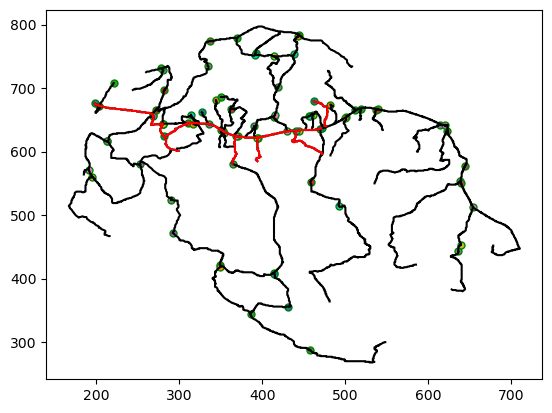

In [247]:
G = nx.DiGraph()
a = [(i, j, k) for i in ds['id_road'].values \

    for j, k in zip(ds[ds['id_road'] == i]['neighbours'].values[0], \
        ds[ds['id_road'] == i]['len_neighbours'].values[0])]
G.add_weighted_edges_from(a)
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)

d = 45
shortest_path_s_v = nx.reconstruct_path(d, 1, predecessors)
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
    plt.scatter(ds[ds['id_road'] == j]['J'].values[0][0], ds[ds['id_road'] == j]['I'].values[0][0], s=25, edgecolors='green')
for i in shortest_path_s_v:
    plt.plot(ds[ds['id_road'] == i]['J'].values[0], ds[ds['id_road'] == i]['I'].values[0], color='red')

In [ ]:
G = nx.DiGraph()
a = [(i, j, k) for i in ds['id_road'].values \

    for j, k in zip(ds[ds['id_road'] == i]['neighbours'].values[0], \
        ds[ds['id_road'] == i]['len_neighbours'].values[0])]
G.add_weighted_edges_from(a)
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)

d = 14
shortest_path_s_v = nx.reconstruct_path(d, 1, predecessors)
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
    plt.scatter(ds[ds['id_road'] == j]['J'].values[0][0], ds[ds['id_road'] == j]['I'].values[0][0], s=25, edgecolors='green')
for i in range(len(shortest_path_s_v)-1):
    plt.plot(ds[ds['id_road'] == shortest_path_s_v[i]]['rasstoyania_j'].values[0][str(shortest_path_s_v[i+1])], ds[ds['id_road'] == shortest_path_s_v[i]]['rasstoyania_i'].values[0][str(shortest_path_s_v[i+1])], color='red')

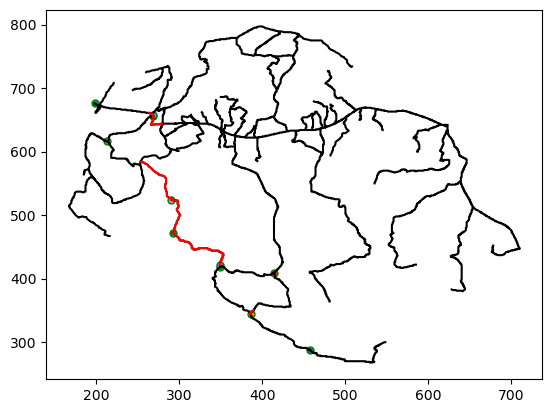

In [12]:
G = nx.DiGraph()
a = [(i, j, k) for i in ds['id_road'].values \

    for j, k in zip(ds[ds['id_road'] == i]['neighbours'].values[0], \
        ds[ds['id_road'] == i]['len_neighbours'].values[0])]
G.add_weighted_edges_from(a)
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)

d = 77
shortest_path_s_v = nx.reconstruct_path(d, 1, predecessors)
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
for i in range(len(shortest_path_s_v)-1):
    plt.plot(ds[ds['id_road'] == shortest_path_s_v[i]]['times_rasstoyania_j'].values[0][str(shortest_path_s_v[i+1])], ds[ds['id_road'] == shortest_path_s_v[i]]['times_rasstoyania_i'].values[0][str(shortest_path_s_v[i+1])], color='red')
    #plt.plot(ds[ds['id_road'] == shortest_path_s_v[i+1]]['rasstoyania_j'].values[0][str(shortest_path_s_v[i])], ds[ds['id_road'] == shortest_path_s_v[i+1]]['rasstoyania_i'].values[0][str(shortest_path_s_v[i])], color='red')
    plt.scatter(ds[ds['id_road'] == shortest_path_s_v[i]]['J'].values[0][0], ds[ds['id_road'] == shortest_path_s_v[i]]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == shortest_path_s_v[-1]]['J'].values[0][0], ds[ds['id_road'] == shortest_path_s_v[-1]]['I'].values[0][0], s=25, edgecolors='green')

In [274]:
shortest_path_s_v

[77, 67, 66, 64, 60, 80, 83, 58, 16, 2, 1]

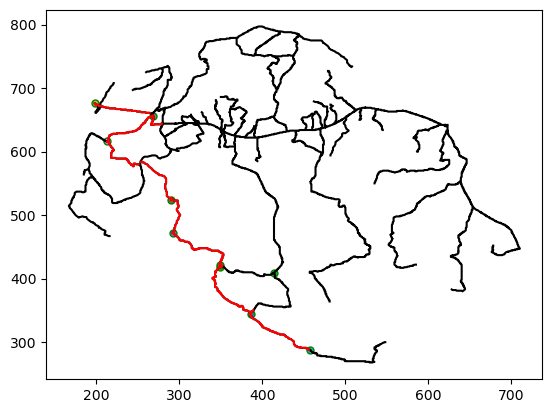

In [34]:
G = nx.DiGraph()
a = [(i, j, k) for i in ds['id_road'].values \

    for j, k in zip(ds[ds['id_road'] == i]['neighbours'].values[0], \
        ds[ds['id_road'] == i]['len_neighbours'].values[0])]
G.add_weighted_edges_from(a)
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)

d = 77
shortest_path_s_v = nx.reconstruct_path(d, 1, predecessors)
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
for i in range(1, len(shortest_path_s_v)-2):
    plt.plot(ds[ds['id_road'] == shortest_path_s_v[i]]['times_rasstoyania_j'].values[0][str(shortest_path_s_v[i+1])], ds[ds['id_road'] == shortest_path_s_v[i]]['times_rasstoyania_i'].values[0][str(shortest_path_s_v[i+1])], color='red')
    plt.plot(ds[ds['id_road'] == shortest_path_s_v[i+1]]['times_rasstoyania_j'].values[0][str(shortest_path_s_v[i])], ds[ds['id_road'] == shortest_path_s_v[i+1]]['times_rasstoyania_i'].values[0][str(shortest_path_s_v[i])], color='red')
    plt.scatter(ds[ds['id_road'] == shortest_path_s_v[i]]['J'].values[0][0], ds[ds['id_road'] == shortest_path_s_v[i]]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == shortest_path_s_v[-1]]['J'].values[0][0], ds[ds['id_road'] == shortest_path_s_v[-1]]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == shortest_path_s_v[0]]['J'].values[0][0], ds[ds['id_road'] == shortest_path_s_v[0]]['I'].values[0][0], s=25, edgecolors='green')
plt.plot(ds[ds['id_road'] == shortest_path_s_v[0]]['time_rasstoyania_j'].values[0][str(shortest_path_s_v[1])], ds[ds['id_road'] == shortest_path_s_v[0]]['time_rasstoyania_i'].values[0][str(shortest_path_s_v[1])], color='red')
plt.plot(ds[ds['id_road'] == shortest_path_s_v[-2]]['rasstoyania_j'].values[0][str(shortest_path_s_v[-1])], ds[ds['id_road'] == shortest_path_s_v[-2]]['rasstoyania_i'].values[0][str(shortest_path_s_v[-1])], color='red')

In [ ]:
dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]))[0][0]
n1 = dist1+1-20
if n1 < 0:
        n1 = 0

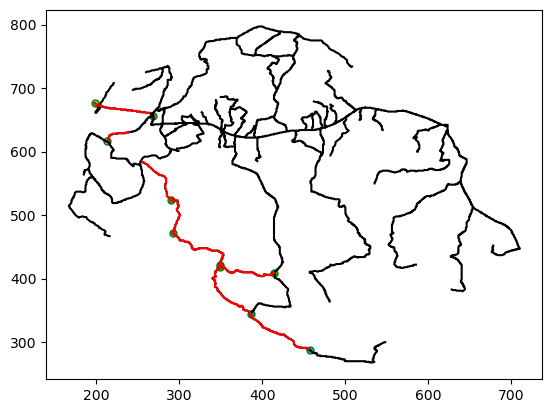

In [43]:
G = nx.DiGraph()
a = [(i, j, k) for i in ds['id_road'].values \

    for j, k in zip(ds[ds['id_road'] == i]['neighbours'].values[0], \
        ds[ds['id_road'] == i]['len_neighbours'].values[0])]
G.add_weighted_edges_from(a)
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)

d = 77
shortest_path_s_v = nx.reconstruct_path(d, 1, predecessors)
a = shortest_path_s_v
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
for i in range(1, len(a)-2):
    dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==a[i]]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==a[i-1]]['coordinate'].values[0]]))[0][0]
    dist2 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==a[i-1]]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==a[i]]['coordinate'].values[0]]))[0][0]
    n1 = dist1+1-20
    n2 = dist2+1-20
    if n1 < 0:
        n1 = 0
    if n2 < 0:
        n2 = 0    
    if len(ds[ds['id_road'] == a[i]]['time_rasstoyania_j'].values[0][str(a[i+1])][n1:]):
        plt.plot(ds[ds['id_road'] == a[i]]['time_rasstoyania_j'].values[0][str(a[i+1])][n1:], ds[ds['id_road'] == a[i]]['time_rasstoyania_i'].values[0][str(a[i+1])][n1:], color='red')
    else:
        plt.plot(ds[ds['id_road'] == a[i+1]]['time_rasstoyania_j'].values[0][str(a[i])][n2:], ds[ds['id_road'] == a[i+1]]['time_rasstoyania_i'].values[0][str(a[i])][n2:], color='red')
   # plt.plot(ds[ds['id_road'] == shortest_path_s_v[i+1]]['time_rasstoyania_j'].values[0][str(shortest_path_s_v[i])][n2:], ds[ds['id_road'] == shortest_path_s_v[i+1]]['time_rasstoyania_i'].values[0][str(shortest_path_s_v[i])][n2:], color='red')
    #plt.plot(ds[ds['id_road'] == shortest_path_s_v[i+1]]['time_rasstoyania_j'].values[0][str(shortest_path_s_v[i])], ds[ds['id_road'] == shortest_path_s_v[i+1]]['time_rasstoyania_i'].values[0][str(shortest_path_s_v[i])], color='red')
    plt.scatter(ds[ds['id_road'] == a[i]]['J'].values[0][0], ds[ds['id_road'] == a[i]]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == a[-1]]['J'].values[0][0], ds[ds['id_road'] == a[-1]]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == a[0]]['J'].values[0][0], ds[ds['id_road'] == a[0]]['I'].values[0][0], s=25, edgecolors='green')
if len(ds[ds['id_road'] == a[0]]['time_rasstoyania_j'].values[0][str(a[1])]):
    plt.plot(ds[ds['id_road'] == a[0]]['time_rasstoyania_j'].values[0][str(a[1])], ds[ds['id_road'] == a[0]]['time_rasstoyania_i'].values[0][str(a[1])], color='red')
else:
    plt.plot(ds[ds['id_road'] == a[1]]['time_rasstoyania_j'].values[0][str(a[0])], ds[ds['id_road'] == a[1]]['time_rasstoyania_i'].values[0][str(a[0])], color='red')
#plt.plot(ds[ds['id_road'] == shortest_path_s_v[1]]['time_rasstoyania_j'].values[0][str(shortest_path_s_v[0])], ds[ds['id_road'] == shortest_path_s_v[1]]['time_rasstoyania_i'].values[0][str(shortest_path_s_v[0])], color='red')
plt.plot(ds[ds['id_road'] == a[-2]]['rasstoyania_j'].values[0][str(a[-1])], ds[ds['id_road'] == a[-2]]['rasstoyania_i'].values[0][str(a[-1])], color='red')

In [55]:
2 in ds[ds['id_road']==1]['neighbours'].values[0]

True

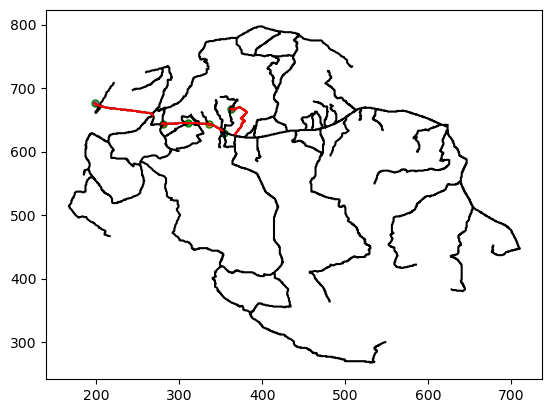

In [128]:
G = nx.DiGraph()
a = [(i, j, k) for i in ds['id_road'].values \

    for j, k in zip(ds[ds['id_road'] == i]['neighbours'].values[0], \
        ds[ds['id_road'] == i]['len_neighbours'].values[0])]
G.add_weighted_edges_from(a)
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)

d = 38
shortest_path_s_v = nx.reconstruct_path(d, 1, predecessors)
a = shortest_path_s_v
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
for i in range(1, len(a)-2):
    dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==a[i]]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==a[i-1]]['coordinate'].values[0]]))[0][0]
    dist2 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==a[i-1]]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==a[i]]['coordinate'].values[0]]))[0][0]
    n1 = dist1+1-20
    n2 = dist2+1-20
    if n1 < 0:
        n1 = 0
    if n2 < 0:
        n2 = 0    
   # plt.plot(ds[ds['id_road'] == a[i-1]]['time_rasstoyania_j'].values[0][str(a[i])], ds[ds['id_road'] == a[i-1]]['time_rasstoyania_i'].values[0][str(a[i])], color='red')
    plt.plot(ds[ds['id_road'] == a[i]]['time_rasstoyania_j'].values[0][str(a[i+1])], ds[ds['id_road'] == a[i]]['time_rasstoyania_i'].values[0][str(a[i+1])], color='red')
    plt.plot(ds[ds['id_road'] == a[i+1]]['time_rasstoyania_j'].values[0][str(a[i])], ds[ds['id_road'] == a[i+1]]['time_rasstoyania_i'].values[0][str(a[i])], color='red')
    #plt.plot(ds[ds['id_road'] == a[i+1]]['time_rasstoyania_j'].values[0][str(a[i])][n2:], ds[ds['id_road'] == a[i+1]]['time_rasstoyania_i'].values[0][str(a[i])][n2:], color='red')
   # plt.plot(ds[ds['id_road'] == a[i-1]]['time_rasstoyania_j'].values[0][str(a[i])][:n2], ds[ds['id_road'] == a[i-1]]['time_rasstoyania_i'].values[0][str(a[i])][:n2], color='red')
   # plt.plot(ds[ds['id_road'] == shortest_path_s_v[i+1]]['time_rasstoyania_j'].values[0][str(shortest_path_s_v[i])][n2:], ds[ds['id_road'] == shortest_path_s_v[i+1]]['time_rasstoyania_i'].values[0][str(shortest_path_s_v[i])][n2:], color='red')
    #plt.plot(ds[ds['id_road'] == shortest_path_s_v[i+1]]['time_rasstoyania_j'].values[0][str(shortest_path_s_v[i])], ds[ds['id_road'] == shortest_path_s_v[i+1]]['time_rasstoyania_i'].values[0][str(shortest_path_s_v[i])], color='red')
    plt.scatter(ds[ds['id_road'] == a[i]]['J'].values[0][0], ds[ds['id_road'] == a[i]]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == a[-1]]['J'].values[0][0], ds[ds['id_road'] == a[-1]]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == a[0]]['J'].values[0][0], ds[ds['id_road'] == a[0]]['I'].values[0][0], s=25, edgecolors='green')
if len(ds[ds['id_road'] == a[0]]['time_rasstoyania_j'].values[0][str(a[1])]):
    plt.plot(ds[ds['id_road'] == a[0]]['time_rasstoyania_j'].values[0][str(a[1])], ds[ds['id_road'] == a[0]]['time_rasstoyania_i'].values[0][str(a[1])], color='red')
else:
    plt.plot(ds[ds['id_road'] == a[1]]['time_rasstoyania_j'].values[0][str(a[0])], ds[ds['id_road'] == a[1]]['time_rasstoyania_i'].values[0][str(a[0])], color='red')
#plt.plot(ds[ds['id_road'] == shortest_path_s_v[1]]['time_rasstoyania_j'].values[0][str(shortest_path_s_v[0])], ds[ds['id_road'] == shortest_path_s_v[1]]['time_rasstoyania_i'].values[0][str(shortest_path_s_v[0])], color='red')
plt.plot(ds[ds['id_road'] == a[-2]]['rasstoyania_j'].values[0][str(a[-1])], ds[ds['id_road'] == a[-2]]['rasstoyania_i'].values[0][str(a[-1])], color='red')

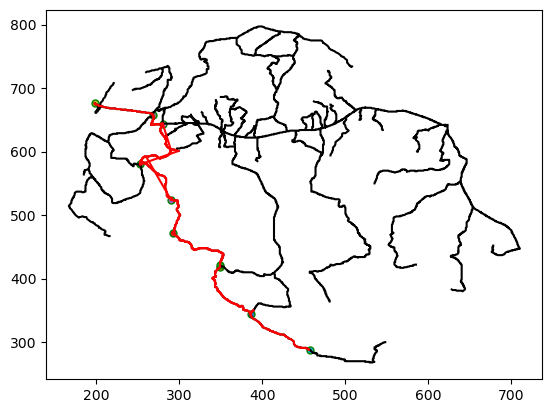

In [232]:
G = nx.DiGraph()
a = [(i, j, k) for i in ds['id_road'].values \

    for j, k in zip(ds[ds['id_road'] == i]['neighbours'].values[0], \
        ds[ds['id_road'] == i]['len_neighbours'].values[0])]
G.add_weighted_edges_from(a)
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)

d = 77
shortest_path_s_v = nx.reconstruct_path(d, 1, predecessors)
a = shortest_path_s_v
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
for i in range(1, len(a)-2):
    dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==a[i]]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==a[i-1]]['coordinate'].values[0]]))[0][0]
    dist2 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==a[i-1]]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==a[i]]['coordinate'].values[0]]))[0][0]
    n1 = dist1+1-20
    n2 = dist2+1-20
    if n1 < 0:
        n1 = 0
    if n2 < 0:
        n2 = 0    
   # plt.plot(ds[ds['id_road'] == a[i-1]]['time_rasstoyania_j'].values[0][str(a[i])], ds[ds['id_road'] == a[i-1]]['time_rasstoyania_i'].values[0][str(a[i])], color='red')
    plt.plot(ds[ds['id_road'] == a[i]]['rasstoyania_j'].values[0][str(a[i+1])], ds[ds['id_road'] == a[i]]['rasstoyania_i'].values[0][str(a[i+1])], color='red')
    plt.plot(ds[ds['id_road'] == a[i+1]]['rasstoyania_j'].values[0][str(a[i])], ds[ds['id_road'] == a[i+1]]['rasstoyania_i'].values[0][str(a[i])], color='red')
    #plt.plot(ds[ds['id_road'] == a[i+1]]['time_rasstoyania_j'].values[0][str(a[i])][n2:], ds[ds['id_road'] == a[i+1]]['time_rasstoyania_i'].values[0][str(a[i])][n2:], color='red')
   # plt.plot(ds[ds['id_road'] == a[i-1]]['time_rasstoyania_j'].values[0][str(a[i])][:n2], ds[ds['id_road'] == a[i-1]]['time_rasstoyania_i'].values[0][str(a[i])][:n2], color='red')
   # plt.plot(ds[ds['id_road'] == shortest_path_s_v[i+1]]['time_rasstoyania_j'].values[0][str(shortest_path_s_v[i])][n2:], ds[ds['id_road'] == shortest_path_s_v[i+1]]['time_rasstoyania_i'].values[0][str(shortest_path_s_v[i])][n2:], color='red')
    #plt.plot(ds[ds['id_road'] == shortest_path_s_v[i+1]]['time_rasstoyania_j'].values[0][str(shortest_path_s_v[i])], ds[ds['id_road'] == shortest_path_s_v[i+1]]['time_rasstoyania_i'].values[0][str(shortest_path_s_v[i])], color='red')
    plt.scatter(ds[ds['id_road'] == a[i]]['J'].values[0][0], ds[ds['id_road'] == a[i]]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == a[-1]]['J'].values[0][0], ds[ds['id_road'] == a[-1]]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == a[0]]['J'].values[0][0], ds[ds['id_road'] == a[0]]['I'].values[0][0], s=25, edgecolors='green')
if len(ds[ds['id_road'] == a[0]]['rasstoyania_j'].values[0][str(a[1])]):
    plt.plot(ds[ds['id_road'] == a[0]]['rasstoyania_j'].values[0][str(a[1])], ds[ds['id_road'] == a[0]]['rasstoyania_i'].values[0][str(a[1])], color='red')
else:
    plt.plot(ds[ds['id_road'] == a[1]]['rasstoyania_j'].values[0][str(a[0])], ds[ds['id_road'] == a[1]]['rasstoyania_i'].values[0][str(a[0])], color='red')
#plt.plot(ds[ds['id_road'] == shortest_path_s_v[1]]['time_rasstoyania_j'].values[0][str(shortest_path_s_v[0])], ds[ds['id_road'] == shortest_path_s_v[1]]['time_rasstoyania_i'].values[0][str(shortest_path_s_v[0])], color='red')
plt.plot(ds[ds['id_road'] == a[-2]]['rasstoyania_j'].values[0][str(a[-1])], ds[ds['id_road'] == a[-2]]['rasstoyania_i'].values[0][str(a[-1])], color='red')

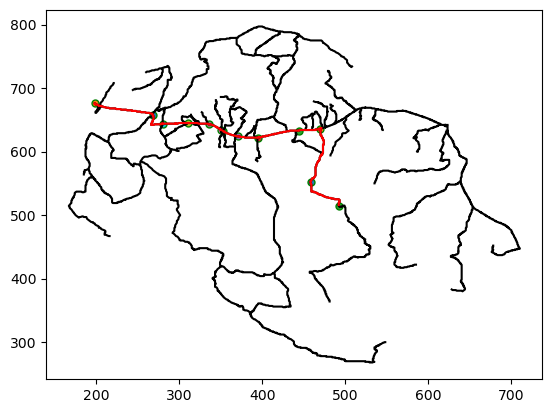

In [243]:
# Решение
G = nx.DiGraph()
a = [(i, j, k) for i in ds['id_road'].values \

    for j, k in zip(ds[ds['id_road'] == i]['neighbours'].values[0], \
        ds[ds['id_road'] == i]['len_neighbours'].values[0])]
G.add_weighted_edges_from(a)
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)

d = 88
shortest_path_s_v = nx.reconstruct_path(d, 1, predecessors)
a = shortest_path_s_v
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
for i in range(1, len(a)-2):
    dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==a[i]]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==a[i-1]]['coordinate'].values[0]]))[0][0]
    dist2 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==a[i-1]]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==a[i]]['coordinate'].values[0]]))[0][0]
    n1 = dist1+1-20
    n2 = dist2+1-20
    if n1 < 0:
        n1 = 0
    if n2 < 0:
        n2 = 0    
   # plt.plot(ds[ds['id_road'] == a[i-1]]['time_rasstoyania_j'].values[0][str(a[i])], ds[ds['id_road'] == a[i-1]]['time_rasstoyania_i'].values[0][str(a[i])], color='red')
    plt.plot(ds[ds['id_road'] == a[i]]['time_rasstoyania_j'].values[0][str(a[i+1])], ds[ds['id_road'] == a[i]]['time_rasstoyania_i'].values[0][str(a[i+1])], color='red')
    plt.plot(ds[ds['id_road'] == a[i+1]]['time_rasstoyania_j'].values[0][str(a[i])], ds[ds['id_road'] == a[i+1]]['time_rasstoyania_i'].values[0][str(a[i])], color='red')
    #plt.plot(ds[ds['id_road'] == a[i+1]]['time_rasstoyania_j'].values[0][str(a[i])][n2:], ds[ds['id_road'] == a[i+1]]['time_rasstoyania_i'].values[0][str(a[i])][n2:], color='red')
   # plt.plot(ds[ds['id_road'] == a[i-1]]['time_rasstoyania_j'].values[0][str(a[i])][:n2], ds[ds['id_road'] == a[i-1]]['time_rasstoyania_i'].values[0][str(a[i])][:n2], color='red')
   # plt.plot(ds[ds['id_road'] == shortest_path_s_v[i+1]]['time_rasstoyania_j'].values[0][str(shortest_path_s_v[i])][n2:], ds[ds['id_road'] == shortest_path_s_v[i+1]]['time_rasstoyania_i'].values[0][str(shortest_path_s_v[i])][n2:], color='red')
    #plt.plot(ds[ds['id_road'] == shortest_path_s_v[i+1]]['time_rasstoyania_j'].values[0][str(shortest_path_s_v[i])], ds[ds['id_road'] == shortest_path_s_v[i+1]]['time_rasstoyania_i'].values[0][str(shortest_path_s_v[i])], color='red')
    plt.scatter(ds[ds['id_road'] == a[i]]['J'].values[0][0], ds[ds['id_road'] == a[i]]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == a[-1]]['J'].values[0][0], ds[ds['id_road'] == a[-1]]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == a[0]]['J'].values[0][0], ds[ds['id_road'] == a[0]]['I'].values[0][0], s=25, edgecolors='green')
if len(ds[ds['id_road'] == a[0]]['rasstoyania_j'].values[0][str(a[1])]):
    plt.plot(ds[ds['id_road'] == a[0]]['rasstoyania_j'].values[0][str(a[1])], ds[ds['id_road'] == a[0]]['rasstoyania_i'].values[0][str(a[1])], color='red')
else:
    plt.plot(ds[ds['id_road'] == a[1]]['rasstoyania_j'].values[0][str(a[0])], ds[ds['id_road'] == a[1]]['rasstoyania_i'].values[0][str(a[0])], color='red')
#plt.plot(ds[ds['id_road'] == shortest_path_s_v[1]]['time_rasstoyania_j'].values[0][str(shortest_path_s_v[0])], ds[ds['id_road'] == shortest_path_s_v[1]]['time_rasstoyania_i'].values[0][str(shortest_path_s_v[0])], color='red')
plt.plot(ds[ds['id_road'] == a[-2]]['rasstoyania_j'].values[0][str(a[-1])], ds[ds['id_road'] == a[-2]]['rasstoyania_i'].values[0][str(a[-1])], color='red')

In [140]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,x,y,x_last,y_last,xy_last,xy,...,NEIG,neighbours,len_neighbours,rasstoyania_i,rasstoyania_j,time_rasstoyania_i,time_rasstoyania_j,times_rasstoyania_i,times_rasstoyania_j,dist
0,1,"[686, 685, 684, 683, 682, 681, 680, 674, 675, ...","[188, 189, 190, 191, 192, 193, 194, 200, 199, ...",110,188,686,258,667,"(258, 667)","(188, 686)",...,"[2, 15, 32]","[2, 14, 15, 16, 32]","[110, 60, 30, 110, 244]","{'2': [676, 675, 675, 674, 674, 674, 673, 673,...","{'2': [198, 198, 199, 199, 200, 201, 202, 203,...","{'2': [676, 675, 675, 674, 674, 674, 673, 673,...","{'2': [198, 198, 199, 199, 200, 201, 202, 203,...","{'2': [657, 656, 656, 655, 655, 654, 653, 653,...","{'2': [268, 268, 269, 269, 269, 269, 269, 269,...","{'2': 126, '14': 30, '15': 30, '16': 125, '32'..."
1,2,"[667, 666, 665, 664, 663, 662, 661, 655, 656, ...","[258, 259, 260, 261, 262, 263, 264, 270, 269, ...",44,258,667,269,654,"(269, 654)","(258, 667)",...,"[1, 3, 16]","[1, 3, 16, 32, 33, 73]","[110, 44, 20, 134, 44, 44]","{'1': [676, 675, 675, 674, 674, 674, 673, 673,...","{'1': [198, 198, 199, 199, 200, 201, 202, 203,...","{'1': [], '3': [657, 656, 656, 655, 655, 654, ...","{'1': [], '3': [268, 268, 269, 269, 269, 269, ...","{'1': [], '3': [644, 644, 644, 644, 644, 644, ...","{'1': [], '3': [280, 279, 280, 281, 282, 283, ...","{'1': 0, '3': 59, '16': 20, '32': 0, '33': 59,..."
2,3,"[654, 653, 652, 651, 650, 649, 648, 642, 643, ...","[270, 271, 272, 273, 274, 275, 276, 282, 281, ...",35,270,654,299,655,"(299, 655)","(270, 654)",...,"[2, 33, 34, 73]","[2, 4, 16, 33, 34, 73, 95]","[44, 35, 0, 0, 54, 0, 78]","{'2': [657, 656, 656, 655, 655, 654, 653, 653,...","{'2': [268, 268, 269, 269, 269, 269, 269, 269,...","{'2': [], '4': [644, 644, 644, 644, 644, 644, ...","{'2': [], '4': [280, 279, 280, 281, 282, 283, ...","{'2': [], '4': [645, 645, 645, 645, 645, 645, ...","{'2': [], '4': [310, 310, 311, 311, 312, 312, ...","{'2': 0, '4': 55, '16': 0, '33': 0, '34': 50, ..."
3,4,"[655, 654, 653, 652, 651, 650, 649, 643, 644, ...","[300, 301, 302, 303, 304, 305, 306, 312, 311, ...",44,300,655,326,653,"(326, 653)","(300, 655)",...,"[5, 35]","[3, 5, 34, 35, 95, 96]","[35, 44, 47, 61, 43, 0]","{'3': [644, 644, 644, 644, 644, 644, 644, 644,...","{'3': [280, 279, 280, 281, 282, 283, 284, 285,...","{'3': [], '5': [645, 645, 645, 645, 645, 645, ...","{'3': [], '5': [310, 310, 311, 311, 312, 312, ...","{'3': [], '5': [643, 643, 643, 643, 643, 642, ...","{'3': [], '5': [336, 337, 337, 338, 338, 339, ...","{'3': 0, '5': 63, '34': 0, '35': 56, '95': 0, ..."
4,5,"[653, 652, 651, 650, 649, 648, 647, 641, 642, ...","[326, 327, 328, 329, 330, 331, 332, 338, 337, ...",33,326,653,342,643,"(342, 643)","(326, 653)",...,"[4, 6, 20]","[4, 6, 20, 21, 35, 36, 37]","[44, 33, 33, 33, 17, 97, 145]","{'4': [645, 645, 645, 645, 645, 645, 645, 645,...","{'4': [310, 310, 311, 311, 312, 312, 313, 313,...","{'4': [], '6': [643, 643, 643, 643, 643, 642, ...","{'4': [], '6': [336, 337, 337, 338, 338, 339, ...","{'4': [], '6': [633, 632, 632, 631, 631, 630, ...","{'4': [], '6': [352, 353, 354, 354, 355, 355, ...","{'4': 0, '6': 54, '20': 46, '21': 46, '35': 0,..."


In [186]:
shortest_path_s_v

[77, 67, 66, 60, 80, 83, 59, 73, 16, 1]

In [187]:
ds.iloc[57:70, :]

,id_road,i_coordinate,j_coordinate,len_road,x,y,x_last,y_last,xy_last,xy,...,NEIG,neighbours,len_neighbours,rasstoyania_i,rasstoyania_j,time_rasstoyania_i,time_rasstoyania_j,times_rasstoyania_i,times_rasstoyania_j,dist
57,62,"[626, 625, 624, 623, 622, 621, 620, 614, 615, ...","[203, 204, 205, 206, 207, 208, 209, 215, 214, ...",120,203,626,175,574,"(175, 574)","(203, 626)",...,[58],"[16, 58, 61, 63]","[112, 0, 120, 120]","{'16': [616, 616, 616, 617, 617, 617, 618, 618...","{'16': [213, 213, 212, 211, 211, 210, 210, 209...","{'16': [616, 616, 616, 617, 617, 617, 618, 618...","{'16': [213, 213, 212, 211, 211, 210, 210, 209...","{'16': [], '58': [616, 615, 615, 614, 613, 612...","{'16': [], '58': [213, 214, 215, 215, 216, 216...","{'16': 18, '58': 0, '61': 125, '63': 136}"
58,63,"[570, 569, 568, 567, 566, 565, 564, 558, 559, ...","[185, 186, 187, 188, 189, 190, 191, 197, 196, ...",107,185,570,206,477,"(206, 477)","(185, 570)",...,[61],"[61, 62]","[34, 120]","{'61': [571, 570, 569, 568, 567, 566, 565, 565...","{'61': [191, 191, 192, 192, 192, 192, 193, 193...","{'61': [], '62': []}","{'61': [], '62': []}","{'61': [547, 546, 545, 545, 544, 543, 543, 542...","{'61': [204, 204, 205, 205, 206, 206, 206, 206...","{'61': 0, '62': 0}"
59,64,"[419, 418, 417, 416, 415, 414, 413, 407, 408, ...","[404, 405, 406, 407, 408, 409, 410, 416, 415, ...",85,404,419,340,429,"(340, 429)","(404, 419)",...,[22],"[22, 60, 65, 66]","[236, 85, 22, 104]","{'22': [580, 580, 579, 579, 578, 578, 578, 577...","{'22': [365, 366, 367, 368, 368, 369, 370, 371...","{'22': [], '60': [409, 409, 408, 408, 407, 407...","{'22': [], '60': [414, 413, 413, 412, 411, 411...","{'22': [], '60': [422, 423, 424, 425, 426, 427...","{'22': [], '60': [349, 349, 349, 349, 349, 350...","{'22': 0, '60': 102, '65': 22, '66': 104}"
60,65,"[418, 417, 416, 415, 414, 413, 412, 406, 407, ...","[404, 405, 406, 407, 408, 409, 410, 416, 415, ...",60,404,418,422,366,"(422, 366)","(404, 418)",...,[],"[64, 75]","[22, 60]","{'64': [409, 409, 408, 408, 407, 407, 406, 406...","{'64': [414, 413, 413, 412, 411, 411, 410, 409...","{'64': [], '75': [408, 407, 406, 405, 404, 403...","{'64': [], '75': [414, 415, 415, 415, 415, 415...","{'64': [404, 405, 405, 405, 406, 406, 407, 408...","{'64': [397, 396, 395, 394, 394, 393, 392, 391...","{'64': 0, '75': 69}"
61,66,"[429, 428, 427, 426, 425, 424, 423, 417, 418, ...","[339, 340, 341, 342, 343, 344, 345, 351, 350, ...",118,339,429,379,360,"(379, 360)","(339, 429)",...,[67],"[60, 64, 67, 75]","[27, 104, 118, 169]","{'60': [422, 423, 424, 425, 426, 427, 428, 429...","{'60': [349, 349, 349, 349, 349, 350, 350, 350...","{'60': [], '64': [419, 418, 417, 416, 415, 413...","{'60': [], '64': [349, 349, 348, 347, 346, 345...","{'60': [444, 444, 444, 444, 444, 444, 444, 444...","{'60': [347, 346, 345, 344, 343, 342, 341, 340...","{'60': 0, '64': 19, '67': 119, '75': 118}"
62,67,"[354, 353, 352, 351, 350, 349, 348, 342, 343, ...","[376, 377, 378, 379, 380, 381, 382, 388, 387, ...",103,376,354,446,298,"(446, 298)","(376, 354)",...,[66],"[66, 77]","[118, 103]","{'66': [419, 418, 417, 416, 415, 413, 412, 411...","{'66': [349, 349, 348, 347, 346, 345, 344, 343...","{'66': [], '77': [344, 343, 342, 341, 341, 340...","{'66': [], '77': [386, 386, 386, 386, 387, 387...","{'66': [], '77': [288, 288, 287, 286, 286, 284...","{'66': [], '77': [457, 458, 458, 458, 459, 460...","{'66': 0, '77': 117}"
63,68,"[562, 561, 560, 559, 558, 557, 556, 550, 551, ...","[448, 449, 450, 451, 452, 453, 454, 460, 459, ...",72,448,562,482,526,"(482, 526)","(448, 562)",...,[],[88],[72],"{'88': [552, 551, 551, 550, 549, 548, 547, 546...","{'88': [458, 458, 458, 458, 459, 459, 459, 459...","{'88': [552, 551, 551, 550, 549, 548, 547, 546...","{'88': [458, 458, 458, 458, 459, 459, 459, 459...","{'88': [515, 515, 514, 514, 513, 513, 513, 513...","{'88': [492, 492, 492, 493, 493, 494, 495, 496...",{'88': 80}
64,69,"[563, 562, 561, 560, 559, 558, 557, 551, 552, ...","[628, 629, 630, 631, 632, 633, 634, 640

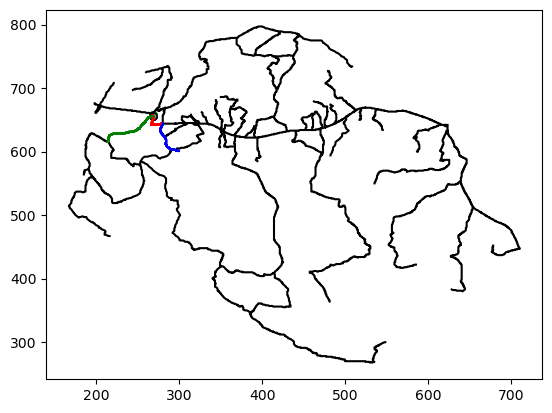

In [173]:
G = nx.DiGraph()
a = [(i, j, k) for i in ds['id_road'].values \

    for j, k in zip(ds[ds['id_road'] == i]['neighbours'].values[0], \
        ds[ds['id_road'] == i]['len_neighbours'].values[0])]
G.add_weighted_edges_from(a)
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)

d = 77
shortest_path_s_v = nx.reconstruct_path(d, 1, predecessors)
a = shortest_path_s_v
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
for i in range(1, len(a)-2):
    plt.plot(ds[ds['id_road'] == 2]['J'].values[0], ds[ds['id_road'] == 2]['I'].values[0], color='red')
    plt.plot(ds[ds['id_road'] == 16]['J'].values[0], ds[ds['id_road'] == 16]['I'].values[0], color='green')
    plt.plot(ds[ds['id_road'] == 73]['J'].values[0], ds[ds['id_road'] == 73]['I'].values[0], color='blue')
    plt.scatter(ds[ds['id_road'] == 2]['J'].values[0][0], ds[ds['id_road'] == 2]['I'].values[0][0], s=25, edgecolors='green')
    plt.scatter(ds[ds['id_road'] == 16]['J'].values[0][0], ds[ds['id_road'] == 16]['I'].values[0][0], s=25, edgecolors='black')

In [34]:
ds[ds['id_road'] == a[0]]['time_rasstoyania_j'].values[0][str(a[1])]

array([], dtype=float64)

In [41]:
if(len(ds[ds['id_road'] == a[2]]['time_rasstoyania_j'].values[0][str(a[1])][:])):
    print(True)

True


In [18]:
ds[ds['id_road'] == shortest_path_s_v[0]]['time_rasstoyania_j'].values[0][str(shortest_path_s_v[1])]

array([], dtype=float64)

In [85]:
shortest_path_s_v

[77, 67, 66, 64, 60, 80, 83, 58, 16, 2, 1]

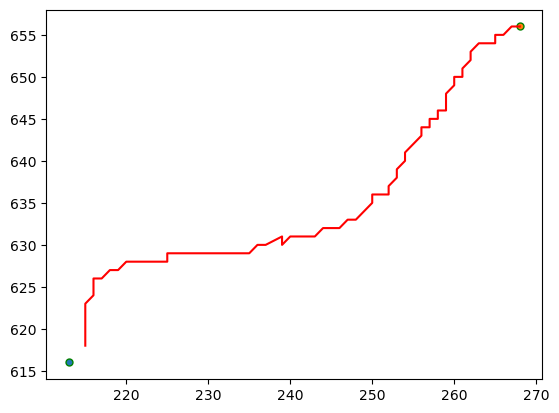

In [264]:
plt.plot(ds[ds['id_road'] == 62]['time_rasstoyania_j'].values[0][str(16)], ds[ds['id_road'] == 62]['time_rasstoyania_i'].values[0][str(16)], color='red')
plt.plot(ds[ds['id_road'] == 16]['time_rasstoyania_j'].values[0][str(62)], ds[ds['id_road'] == 16]['time_rasstoyania_i'].values[0][str(62)], color='red')
plt.scatter(ds[ds['id_road'] == 62]['J'].values[0][0], ds[ds['id_road'] == 62]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == 16]['J'].values[0][0], ds[ds['id_road'] == 16]['I'].values[0][0], s=25, edgecolors='green')

In [284]:
shortest_path_s_v

[77, 67, 66, 64, 60, 80, 83, 58, 16, 2, 1]

In [ ]:
G = nx.DiGraph()
a = [(i, j, k) for i in ds['id_road'].values \

    for j, k in zip(ds[ds['id_road'] == i]['neighbours'].values[0], \
        ds[ds['id_road'] == i]['len_neighbours'].values[0])]
G.add_weighted_edges_from(a)
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)

d = 77
shortest_path_s_v = nx.reconstruct_path(d, 1, predecessors)
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
for i in range(1, len(shortest_path_s_v)-2):
    plt.plot(ds[ds['id_road'] == shortest_path_s_v[i]]['times_rasstoyania_j'].values[0][str(shortest_path_s_v[i+1])], ds[ds['id_road'] == shortest_path_s_v[i]]['times_rasstoyania_i'].values[0][str(shortest_path_s_v[i+1])], color='red')
    plt.plot(ds[ds['id_road'] == shortest_path_s_v[i+1]]['times_rasstoyania_j'].values[0][str(shortest_path_s_v[i])], ds[ds['id_road'] == shortest_path_s_v[i+1]]['times_rasstoyania_i'].values[0][str(shortest_path_s_v[i])], color='red')
    plt.scatter(ds[ds['id_road'] == shortest_path_s_v[i]]['J'].values[0][0], ds[ds['id_road'] == shortest_path_s_v[i]]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == shortest_path_s_v[-1]]['J'].values[0][0], ds[ds['id_road'] == shortest_path_s_v[-1]]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == shortest_path_s_v[0]]['J'].values[0][0], ds[ds['id_road'] == shortest_path_s_v[0]]['I'].values[0][0], s=25, edgecolors='green')
plt.plot(ds[ds['id_road'] == shortest_path_s_v[0]]['time_rasstoyania_j'].values[0][str(shortest_path_s_v[1])], ds[ds['id_road'] == shortest_path_s_v[0]]['time_rasstoyania_i'].values[0][str(shortest_path_s_v[1])], color='red')
plt.plot(ds[ds['id_road'] == shortest_path_s_v[-2]]['rasstoyania_j'].values[0][str(shortest_path_s_v[-1])], ds[ds['id_road'] == shortest_path_s_v[-2]]['rasstoyania_i'].values[0][str(shortest_path_s_v[-1])], color='red')

In [ ]:
ds[ds['id_road'] == shortest_path_s_v[1]]['J'].values[0][str(shortest_path_s_v[2])][ds[ds['id_road']==1]['dist'].values[0]['2']:]

In [25]:
ds[ds['id_road']==14]['dist'].values[0]['1']

37

In [24]:
ds[ds['id_road'] == 14]['J'].values[0][str('1')][ds[ds['id_road']==14]['dist'].values[0]['1']:]

TypeError: list indices must be integers or slices, not str

In [29]:
ds[ds['id_road'] == 14]['J'].values[0]['1']

TypeError: list indices must be integers or slices, not str

In [33]:
ds[ds['id_road'] == 14]['J'].values[0][ds[ds['id_road']==14]['dist'].values[0]['1']:]

[]

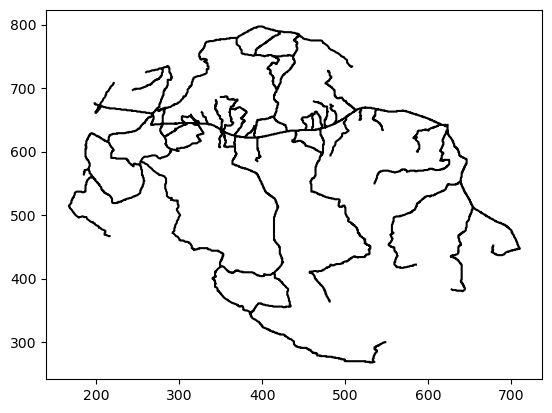

In [32]:
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
plt.plot(ds[ds['id_road'] == 14]['J'].values[0][ds[ds['id_road']==14]['dist'].values[0]['1']:], \
    ds[ds['id_road'] == 14]['I'].values[0][ds[ds['id_road']==14]['dist'].values[0]['1']:])

In [20]:
ds[ds['id_road']==1]['dist'].values[0]['2']

0

In [21]:
ds[ds['id_road']==2]['dist'].values[0]['1']

98

In [179]:
ds.head(16)

,id_road,i_coordinate,j_coordinate,len_road,x,y,x_last,y_last,xy_last,xy,...,NEIG,neighbours,len_neighbours,rasstoyania_i,rasstoyania_j,time_rasstoyania_i,time_rasstoyania_j,times_rasstoyania_i,times_rasstoyania_j,dist
0,1,"[686, 685, 684, 683, 682, 681, 680, 674, 675, ...","[188, 189, 190, 191, 192, 193, 194, 200, 199, ...",110,188,686,258,667,"(258, 667)","(188, 686)",...,"[2, 15, 32]","[2, 14, 15, 16, 32]","[110, 52, 22, 110, 244]","{'2': [676, 675, 675, 674, 674, 674, 673, 673,...","{'2': [198, 198, 199, 199, 200, 201, 202, 203,...","{'2': [676, 675, 675, 674, 674, 674, 673, 673,...","{'2': [198, 198, 199, 199, 200, 201, 202, 203,...","{'2': [657, 656, 656, 655, 655, 654, 653, 653,...","{'2': [268, 268, 269, 269, 269, 269, 269, 269,...","{'2': 118, '14': 22, '15': 22, '16': 117, '32'..."
1,2,"[667, 666, 665, 664, 663, 662, 661, 655, 656, ...","[258, 259, 260, 261, 262, 263, 264, 270, 269, ...",44,258,667,269,654,"(269, 654)","(258, 667)",...,"[1, 3, 16]","[1, 3, 16, 32, 33, 73]","[110, 44, 12, 134, 44, 44]","{'1': [676, 675, 675, 674, 674, 674, 673, 673,...","{'1': [198, 198, 199, 199, 200, 201, 202, 203,...","{'1': [], '3': [657, 656, 656, 655, 655, 654, ...","{'1': [], '3': [268, 268, 269, 269, 269, 269, ...","{'1': [], '3': [644, 644, 644, 644, 644, 644, ...","{'1': [], '3': [280, 279, 280, 281, 282, 283, ...","{'1': 0, '3': 51, '16': 12, '32': 0, '33': 51,..."
2,3,"[654, 653, 652, 651, 650, 649, 648, 642, 643, ...","[270, 271, 272, 273, 274, 275, 276, 282, 281, ...",35,270,654,299,655,"(299, 655)","(270, 654)",...,"[2, 33, 34, 73]","[2, 4, 16, 33, 34, 73, 95]","[44, 35, 0, 0, 46, 0, 78]","{'2': [657, 656, 656, 655, 655, 654, 653, 653,...","{'2': [268, 268, 269, 269, 269, 269, 269, 269,...","{'2': [], '4': [644, 644, 644, 644, 644, 644, ...","{'2': [], '4': [280, 279, 280, 281, 282, 283, ...","{'2': [], '4': [645, 645, 645, 645, 645, 645, ...","{'2': [], '4': [310, 310, 311, 311, 312, 312, ...","{'2': 0, '4': 47, '16': 0, '33': 0, '34': 42, ..."
3,4,"[655, 654, 653, 652, 651, 650, 649, 643, 644, ...","[300, 301, 302, 303, 304, 305, 306, 312, 311, ...",44,300,655,326,653,"(326, 653)","(300, 655)",...,"[5, 35]","[3, 5, 34, 35, 95, 96]","[35, 44, 47, 61, 43, 0]","{'3': [644, 644, 644, 644, 644, 644, 644, 644,...","{'3': [280, 279, 280, 281, 282, 283, 284, 285,...","{'3': [], '5': [645, 645, 645, 645, 645, 645, ...","{'3': [], '5': [310, 310, 311, 311, 312, 312, ...","{'3': [], '5': [643, 643, 643, 643, 643, 642, ...","{'3': [], '5': [336, 337, 337, 338, 338, 339, ...","{'3': 0, '5': 55, '34': 0, '35': 48, '95': 0, ..."
4,5,"[653, 652, 651, 650, 649, 648, 647, 641, 642, ...","[326, 327, 328, 329, 330, 331, 332, 338, 337, ...",33,326,653,342,643,"(342, 643)","(326, 653)",...,"[4, 6, 20]","[4, 6, 20, 21, 35, 36, 37]","[44, 33, 33, 33, 17, 97, 145]","{'4': [645, 645, 645, 645, 645, 645, 645, 645,...","{'4': [310, 310, 311, 311, 312, 312, 313, 313,...","{'4': [], '6': [643, 643, 643, 643, 643, 642, ...","{'4': [], '6': [336, 337, 337, 338, 338, 339, ...","{'4': [], '6': [633, 632, 632, 631, 631, 630, ...","{'4': [], '6': [352, 353, 354, 354, 355, 355, ...","{'4': 0, '6': 46, '20': 38, '21': 38, '35': 0,..."
5,6,"[643, 642, 641, 640, 639, 638, 637, 631, 632, ...","[342, 343, 344, 345, 346, 347, 348, 354, 353, ...",22,342,643,360,634,"(360, 634)","(342, 643)",...,[5],"[5, 7, 20, 21, 36, 37, 38, 39, 82]","[33, 22, 37, 41, 64, 112, 115, 56, 22]","{'5': [643, 643, 643, 643, 643, 642, 642, 642,...","{'5': [336, 337, 337, 338, 338, 339, 339, 340,...","{'5': [], '7': [633, 632, 632, 631, 631, 630, ...","{'5': [], '7': [352, 353, 354, 354, 355, 355, ...","{'5': [], '7': [624, 624, 624, 623, 623, 623, ...","{'5': [], '7': [371, 372, 373, 373, 374, 375, ...","{'5': 0, '7': 37, '20': 13, '21': 25, '36': 0,..."
6,7,"[634, 633, 632, 631, 630, 629, 628, 622, 623, ...","[361, 362, 363, 364, 365, 366, 367, 373, 372, ...",37,361,634,384,632,"(384, 632)","(361, 634)",...,[23],"[6, 8, 23, 38, 39, 40, 82]","[22, 37, 37, 93, 56, 95, 36]","{'6': [633

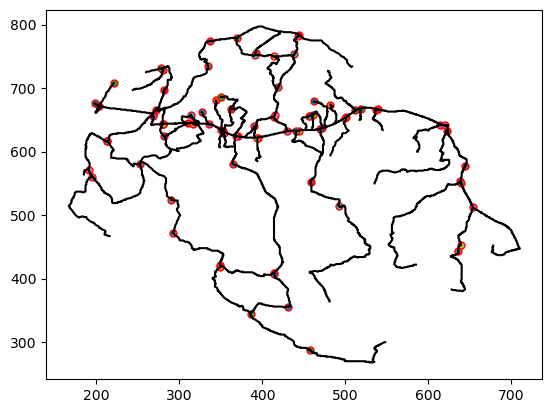

In [17]:
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], \
        color='000')
    plt.scatter(ds[ds['id_road'] == j]['J'].values[0][0], ds[ds['id_road'] == j]['I'].values[0][0], s=25, edgecolors='red')

In [ ]:
nx.reconstruct_path('s', 'v', predecessors)

In [55]:
ds[ds['id_road'] == 2]['rasstoyania_j'].values[0][str(1)]

array([268, 268, 269, 269, 269, 269, 269, 269, 269, 269, 269, 269, 268,
       268, 268, 268, 268, 268, 267, 267, 267, 267, 266, 266, 266, 266,
       267, 268, 269, 270, 271, 272, 273, 273, 274, 274, 275, 275, 276,
       277, 277, 278, 278, 279, 203, 202, 201, 200, 199, 199, 198, 198])

In [56]:
ds[ds['id_road'] == 2]['rasstoyania_i'].values[0][str(1)]

array([657, 656, 656, 655, 655, 654, 653, 653, 652, 652, 651, 651, 650,
       649, 649, 648, 648, 647, 647, 646, 645, 644, 644, 643, 643, 642,
       642, 642, 642, 643, 643, 643, 643, 643, 643, 643, 643, 643, 643,
       643, 643, 643, 644, 644, 673, 673, 674, 674, 674, 675, 675, 676])

In [58]:
shortest_path_s_v

[45, 9, 24, 8, 41, 40, 7, 38, 6, 5, 4, 95, 3, 2, 1]

KeyError: '9'

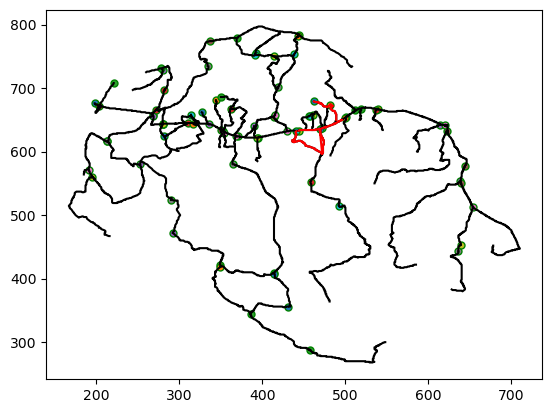

In [226]:
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
    plt.scatter(ds[ds['id_road'] == j]['J'].values[0][0], ds[ds['id_road'] == j]['I'].values[0][0], s=25, edgecolors='green')
for i in shortest_path_s_v:
    if i!=1:
        plt.plot(ds[ds['id_road'] == i]['rasstoyania_j'].values[0][str(i+1)], ds[ds['id_road'] == i]['rasstoyania_i'].values[0][str(i+1)], color='red')

In [41]:
len(ds[ds['id_road'] == 1]['J'].values[0])

110

In [ ]:
len(ds[ds['id_road'] == 1]['I'].values[0])

In [44]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,I,J,x,y,x_last,y_last,xy_last,xy,coordinate,neighbours,len_neighbours,rasstoyania_i,rasstoyania_j
0,1,"[661, 660, 659, 658, 657, 653, 654, 655, 656, ...","[264, 265, 266, 267, 268, 272, 271, 270, 269, ...",110,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",264,661,194,680,"(194, 680)","(264, 661)","[(661, 264), (660, 265), (659, 266), (658, 267...","[2, 14, 15, 16, 32]","[61, 124, 117, 120, 6]","{'2': [676, 657, 656, 656, 655, 655, 654, 653,...","{'2': [198, 268, 268, 269, 269, 269, 269, 269,..."
1,2,"[648, 647, 646, 645, 644, 640, 641, 642, 643, ...","[275, 276, 277, 278, 279, 283, 282, 281, 280, ...",44,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",275,648,264,661,"(264, 661)","(275, 648)","[(648, 275), (647, 276), (646, 277), (645, 278...","[1, 3, 16, 32, 33, 73]","[61, 57, 168, 72, 65, 76]","{'1': [657, 656, 656, 655, 655, 654, 653, 653,...","{'1': [268, 268, 269, 269, 269, 269, 269, 269,..."
2,3,"[649, 648, 647, 646, 645, 641, 642, 643, 644, ...","[305, 306, 307, 308, 309, 313, 312, 311, 310, ...",35,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",305,649,276,648,"(276, 648)","(305, 649)","[(649, 305), (648, 306), (647, 307), (646, 308...","[2, 33, 34, 73, 95]","[57, 100, 27, 121, 14]","{'2': [644, 644, 644, 644, 644, 644, 644, 644,...","{'2': [280, 279, 280, 281, 282, 283, 284, 285,..."
3,4,"[647, 646, 645, 644, 643, 639, 640, 641, 642, ...","[332, 333, 334, 335, 336, 340, 339, 338, 337, ...",44,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",332,647,306,649,"(306, 649)","(332, 647)","[(647, 332), (646, 333), (645, 334), (644, 335...","[5, 34, 35, 95, 96]","[52, 78, 6, 66, 149]","{'5': [645, 643, 643, 643, 643, 643, 642, 642,...","{'5': [310, 336, 337, 337, 338, 338, 339, 339,..."
4,5,"[637, 636, 635, 634, 633, 629, 630, 631, 632, ...","[348, 349, 350, 351, 352, 356, 355, 354, 353, ...",33,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",348,637,332,647,"(332, 647)","(348, 637)","[(637, 348), (636, 349), (635, 350), (634, 351...","[4, 6, 20, 21, 35, 36, 37]","[52, 36, 66, 109, 91, 36, 8]","{'4': [643, 643, 643, 643, 643, 642, 642, 642,...","{'4': [336, 337, 337, 338, 338, 339, 339, 340,..."


In [ ]:
plt.plot(ds[ds['id_road'] == 1]['J'].values[0], ds[ds['id_road'] == 1]['I'].values[0], color='red')
plt.plot(ds[ds['id_road'] == 14]['J'].values[0], ds[ds['id_road'] == 14]['I'].values[0], color='red')

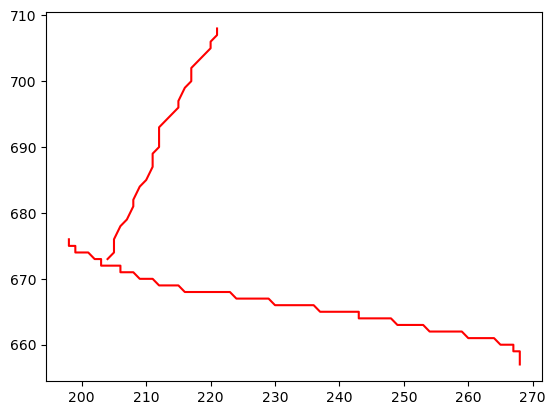

In [202]:
plt.plot(ds[ds['id_road'] == 1]['J'].values[0], ds[ds['id_road'] == 1]['I'].values[0], color='red')
plt.plot(ds[ds['id_road'] == 14]['J'].values[0], ds[ds['id_road'] == 14]['I'].values[0], color='red')

In [108]:
len(ds[ds['id_road'] == 1]['J'].values[0])

110

In [110]:
ds[ds['id_road'] == 1]['j_coordinate'].values[0][118]

206

In [111]:
ds[ds['id_road'] == 14]['j_coordinate'].values[0][8]

205

In [114]:
ds[ds['id_road'] == 14]['i_coordinate'].values[0][0]

677

In [113]:
ds[ds['id_road'] == 1]['i_coordinate'].values[0][118]

672

In [141]:
ds[ds['id_road'] == 14]['I'].values[0][:7+1]

[708, 707, 706, 705, 704, 704, 703, 702]

In [145]:
ds[ds['id_road'] == 14]['i_coordinate'].values[0][:7+1]

[712, 711, 710, 709, 708, 712, 711, 710]

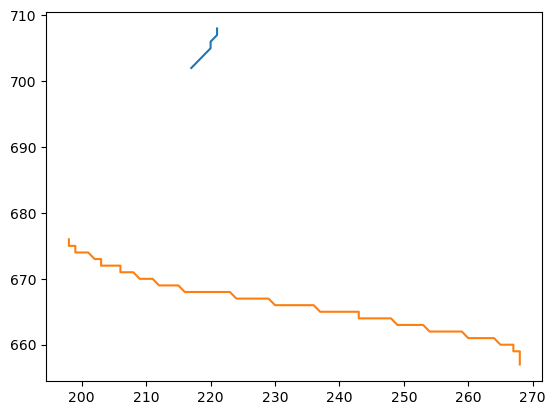

In [144]:
plt.plot(ds[ds['id_road'] == 14]['J'].values[0][:7+1][::-1], ds[ds['id_road'] == 14]['I'].values[0][:7+1][::-1])
plt.plot(ds[ds['id_road'] == 1]['J'].values[0][:117+1], ds[ds['id_road'] == 1]['I'].values[0][:117+1])

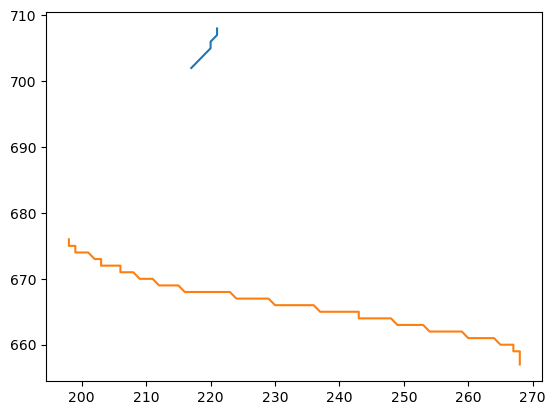

In [201]:
plt.plot(ds[ds['id_road'] == 14]['J'].values[0][:7+1], ds[ds['id_road'] == 14]['I'].values[0][:7+1])
plt.plot(ds[ds['id_road'] == 1]['J'].values[0][:117+1], ds[ds['id_road'] == 1]['I'].values[0][:117+1])

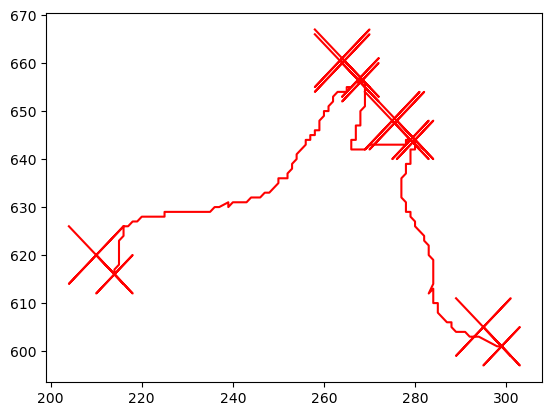

In [178]:
plt.plot(ds[ds['id_road'] == 73]['j_coordinate'].values[0], ds[ds['id_road'] == 73]['i_coordinate'].values[0], color='red')
plt.plot(ds[ds['id_road'] == 2]['j_coordinate'].values[0], ds[ds['id_road'] == 2]['i_coordinate'].values[0], color='red')
plt.plot(ds[ds['id_road'] == 16]['j_coordinate'].values[0], ds[ds['id_road'] == 16]['i_coordinate'].values[0], color='red')

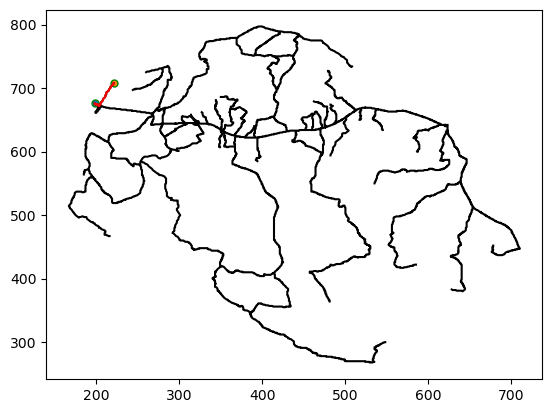

In [223]:
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
plt.scatter(ds[ds['id_road'] == 1]['J'].values[0][0], ds[ds['id_road'] == 1]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == 14]['J'].values[0][0], ds[ds['id_road'] == 14]['I'].values[0][0], s=25, edgecolors='green')
plt.plot(ds[ds['id_road'] == 14]['rasstoyania_j'].values[0][str(1)], ds[ds['id_road'] == 14]['rasstoyania_i'].values[0][str(1)], color='red')

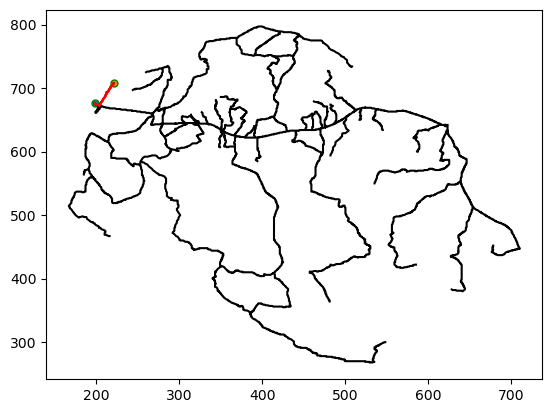

In [224]:
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
plt.scatter(ds[ds['id_road'] == 1]['J'].values[0][0], ds[ds['id_road'] == 1]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == 14]['J'].values[0][0], ds[ds['id_road'] == 14]['I'].values[0][0], s=25, edgecolors='green')
plt.plot(ds[ds['id_road'] == 1]['rasstoyania_j'].values[0][str(14)], ds[ds['id_road'] == 1]['rasstoyania_i'].values[0][str(14)], color='red')

In [167]:
ds[ds['id_road']==1]['coordinate'].values[0]

[(680, 680),
 (679, 679),
 (678, 678),
 (677, 677),
 (676, 676),
 (680, 680),
 (679, 679),
 (678, 678),
 (677, 677),
 (676, 676),
 (680, 680),
 (679, 679),
 (678, 678),
 (677, 677),
 (676, 676),
 (680, 680),
 (679, 679),
 (678, 678),
 (677, 677),
 (676, 676),
 (676, 198),
 (675, 198),
 (675, 199),
 (674, 199),
 (674, 200),
 (674, 201),
 (673, 202),
 (673, 203),
 (672, 203),
 (672, 204),
 (672, 205),
 (672, 206),
 (671, 206),
 (671, 207),
 (671, 208),
 (670, 209),
 (670, 210),
 (670, 211),
 (669, 212),
 (669, 213),
 (669, 214),
 (669, 214),
 (669, 215),
 (668, 216),
 (668, 216),
 (668, 216),
 (668, 217),
 (668, 217),
 (668, 218),
 (668, 218),
 (668, 219),
 (668, 220),
 (668, 220),
 (668, 221),
 (668, 222),
 (668, 222),
 (668, 223),
 (667, 224),
 (667, 225),
 (667, 225),
 (667, 226),
 (667, 226),
 (667, 227),
 (667, 227),
 (667, 228),
 (667, 229),
 (666, 230),
 (666, 230),
 (666, 231),
 (666, 232),
 (666, 232),
 (666, 233),
 (666, 234),
 (666, 235),
 (666, 235),
 (666, 236),
 (665, 237),

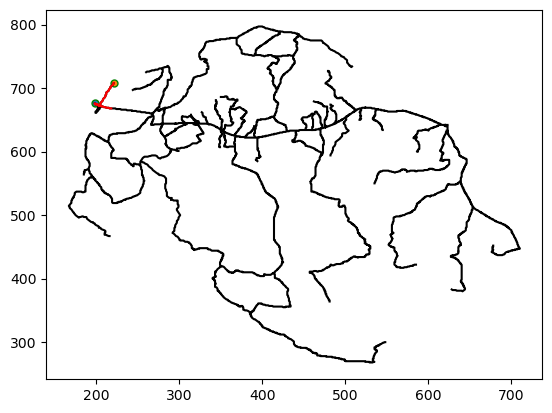

In [164]:
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
plt.scatter(ds[ds['id_road'] == 1]['J'].values[0][0], ds[ds['id_road'] == 1]['I'].values[0][0], s=25, edgecolors='green')
plt.scatter(ds[ds['id_road'] == 14]['J'].values[0][0], ds[ds['id_road'] == 14]['I'].values[0][0], s=25, edgecolors='green')
plt.plot(ds[ds['id_road'] == 14]['rasstoyania_j'].values[0][str(1)], ds[ds['id_road'] == 14]['rasstoyania_i'].values[0][str(1)], color='red')

In [161]:
ds[ds['id_road']==1]['I'].values[0][0]

676

In [162]:
ds[ds['id_road']==1]['J'].values[0][0]

198

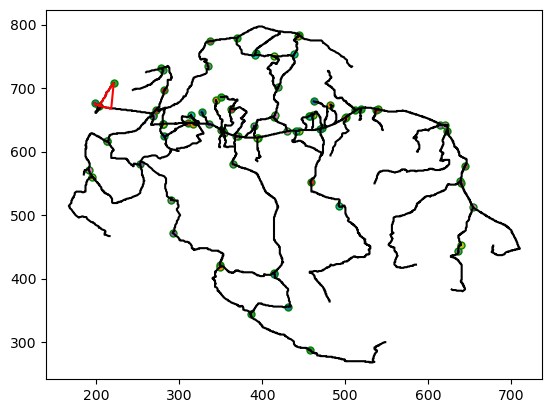

In [150]:
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
    plt.scatter(ds[ds['id_road'] == j]['J'].values[0][0], ds[ds['id_road'] == j]['I'].values[0][0], s=25, edgecolors='green')
plt.plot(ds[ds['id_road'] == 1]['rasstoyania_j'].values[0][str(14)], ds[ds['id_road'] == 1]['rasstoyania_i'].values[0][str(14)], color='red')

In [ ]:
for j in ds['id_road']:
    plt.plot(ds[ds['id_road'] == j]['J'].values[0], ds[ds['id_road'] == j]['I'].values[0], color='000')
    plt.scatter(ds[ds['id_road'] == j]['J'].values[0][0], ds[ds['id_road'] == j]['I'].values[0][0], s=25, edgecolors='green')
plt.plot(ds[ds['id_road'] == 1]['rasstoyania_j'].values[0][str(14)], ds[ds['id_road'] == 1]['rasstoyania_i'].values[0][str(14)], color='red')

In [30]:
ds[ds['id_road'] == 1]['rasstoyania_j'].values[0][str(14)]

array([198, 198, 199, 199, 200, 201, 202, 203, 203, 204, 205, 206, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 214, 215, 216, 216, 216,
       217, 217, 218, 218, 219, 220, 220, 221, 222, 222, 223, 224, 225,
       225, 226, 226, 227, 227, 228, 229, 230, 230, 231, 232, 232, 233,
       234, 235, 235, 236, 237, 238, 238, 239, 240, 241, 241, 242, 243,
       243, 244, 245, 245, 246, 247, 247, 248, 249, 249, 250, 250, 251,
       251, 252, 253, 253, 254, 254, 255, 256, 257, 257, 258, 258, 259,
       259, 260, 261, 261, 262, 263, 264, 264, 265, 265, 266, 266, 267,
       267, 267, 268, 268, 268, 268, 217, 218, 219, 219, 220, 220, 221,
       221])

In [36]:
ds[ds['id_road']==14]['coordinate'].values[0]

[(677, 200),
 (676, 201),
 (675, 202),
 (674, 203),
 (673, 204),
 (669, 208),
 (670, 207),
 (671, 206),
 (672, 205),
 (673, 204),
 (669, 200),
 (670, 201),
 (671, 202),
 (672, 203),
 (673, 204),
 (677, 208),
 (676, 207),
 (675, 206),
 (674, 205),
 (673, 204),
 (673, 204),
 (674, 205),
 (676, 205),
 (678, 206),
 (679, 207),
 (679, 207),
 (681, 208),
 (682, 208),
 (684, 209),
 (685, 210),
 (687, 211),
 (688, 211),
 (689, 211),
 (690, 212),
 (691, 212),
 (693, 212),
 (694, 213),
 (695, 214),
 (696, 215),
 (697, 215),
 (699, 216),
 (700, 217),
 (702, 217),
 (703, 218),
 (704, 219),
 (704, 219),
 (705, 220),
 (706, 220),
 (707, 221),
 (708, 221),
 (708, 221),
 (709, 222),
 (710, 223),
 (711, 224),
 (712, 225),
 (708, 221),
 (707, 220),
 (706, 219),
 (705, 218),
 (704, 217),
 (708, 221),
 (707, 222),
 (706, 223),
 (705, 224),
 (704, 225),
 (708, 221),
 (709, 220),
 (710, 219),
 (711, 218),
 (712, 217)]

In [38]:
ds[ds['id_road'] == 14]['J'].values[0][0]

KeyError: 'J'

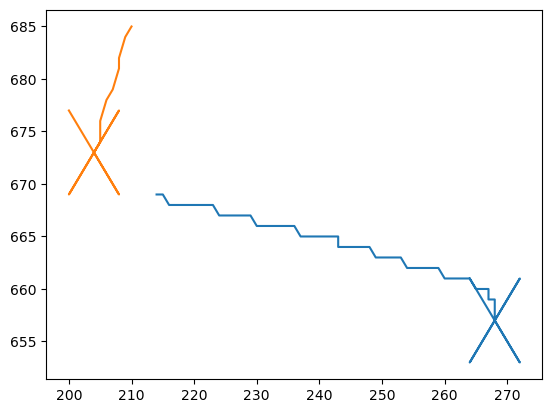

In [33]:
plt.plot(np.array(ds[ds['id_road'] == 1]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] == 1]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == 1]['len_road']), 1], \
              np.array(ds[ds['id_road'] == 1]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] ==1]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == 1]['len_road']), 0], label='Дорога1')
plt.plot(np.array(ds[ds['id_road'] == 14]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] == 14]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == 14]['len_road']), 1], \
              np.array(ds[ds['id_road'] == 14]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] == 14]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == 14]['len_road']), 0], label='Дорога1')

In [91]:
np.array(ds[ds['id_road'] == 16]['coordinate'].values).reshape(ds[ds['id_road'] == 16]['coordinate'].values[0].shape[1], 2)

AttributeError: 'list' object has no attribute 'shape'

In [78]:
np.array(ds[ds['id_road'] == 58]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] == 58]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == 58]['len_road']), 1]

array([247, 248, 249, 250, 251, 255, 254, 253, 252, 251, 247, 248, 249,
       250, 251, 255, 254, 253, 252, 251, 251, 250, 249, 248, 247, 246,
       245, 245, 245, 245, 245, 244, 244, 243, 242, 242, 241, 240, 239,
       239, 239, 238, 238, 238, 237, 237, 236, 236, 235, 235, 234, 233,
       232, 231, 230, 229, 228, 227, 226, 226, 225, 224, 223, 223, 222,
       221, 220, 219, 219, 218, 218, 218, 218, 218, 218, 218, 218, 218,
       218, 218, 218, 219, 219, 219, 220, 221])

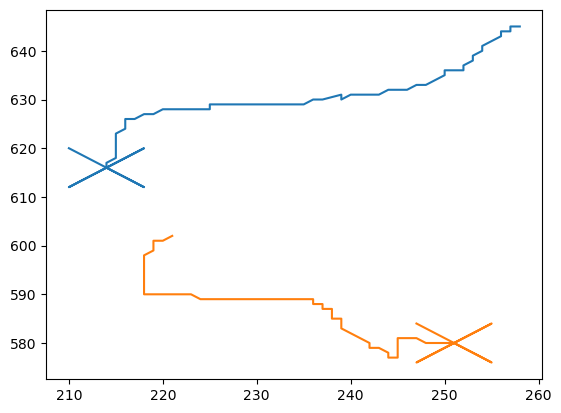

In [34]:
plt.plot(ds[ds['id_road'] == 16]['coordinate'].value \
              np.array(ds[ds['id_road'] == 16]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] == 16]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == 16]['len_road']), 0], label='Дорога1')
plt.plot(np.array(ds[ds['id_road'] == 58]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] == 58]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == 58]['len_road']), 1], \
              np.array(ds[ds['id_road'] == 58]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] == 58]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == 58]['len_road']), 0], label='Дорога1')